# Data analysis of the database : NDC, CCDB and IFADV

In [9]:
import copy
import matplotlib.pyplot as plt
import warnings

from snl_stats_extraction_data import *
DIR, databases_pair_paths, databases_paths, tier_lists, databases, databases_pairs, tiers = get_parameters()

### Parameters

In [10]:
databases_name = [key.replace('_paths','').upper() for key in databases.keys()]
databases_pairs = [key for key in databases_pairs.keys()]
expressions = ["Smiles_0", "Laughs_0"]
# entities = {expression : tier_lists[expression] for expression in expressions}
laughs_intensities = tier_lists['Laughs_0']
smiles_intensities = tier_lists['Smiles_0']
delta = 0

## Mimicry (inter)

We look at the capacity of someone to mimic someone else expression in an interaction. ( A / B -> person B mimic person A for the moment.)

By definition, an event is mimicry when the same expression is replicated. For the purpose of this study, and to analyse the influence of two expressions on each other (smiles and laughs), the definition is extended to copying different expressions as well, i.e., smiles mimicking laughs and vice versa.

We thus calculate the mimicry of each expression at a given intensity on another, and spk on lsn and vice versa for a delta = 0.

### Mimicry Smiles vs Laughs (all entities) for each database

#### Extraction of the stats :

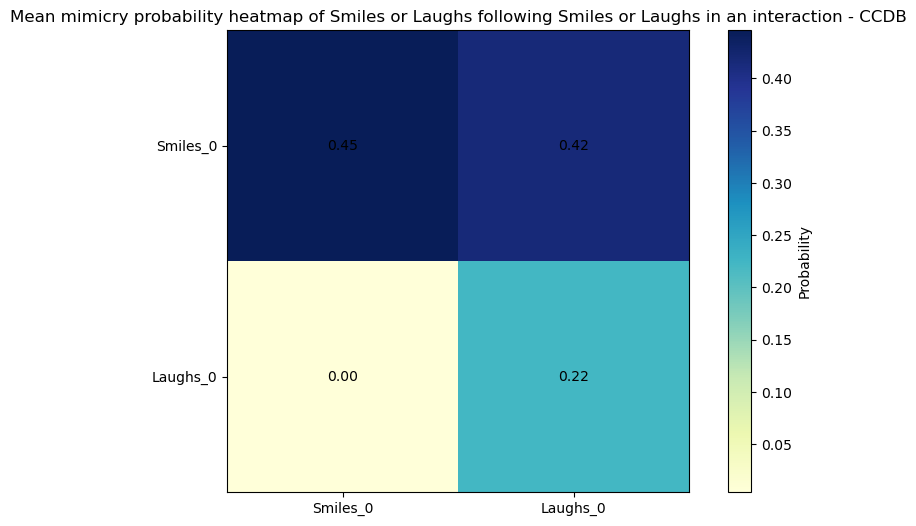

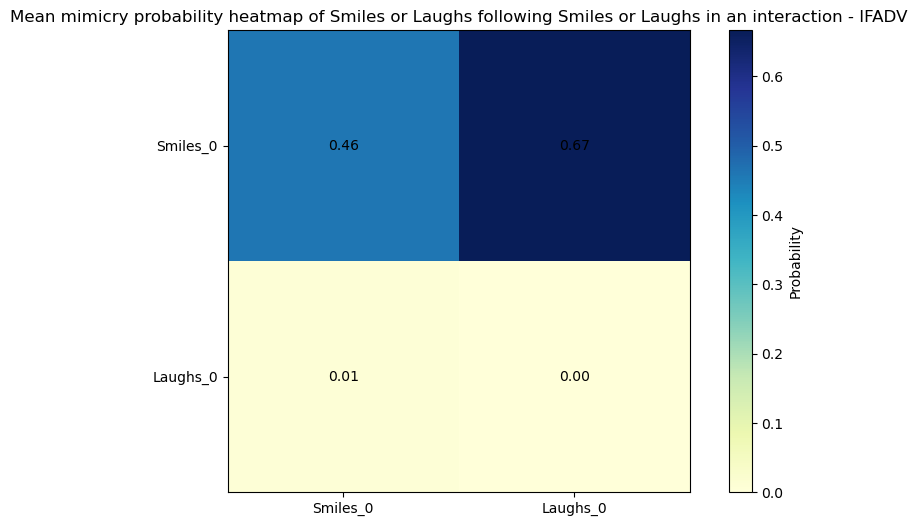

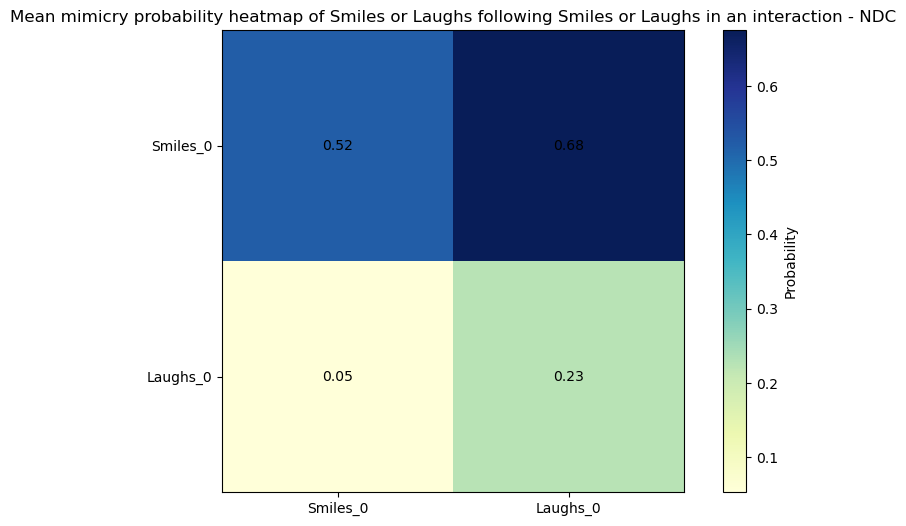

In [4]:
probabilities_matrix = []
moyenne_prob_interaction = 0
for i, database in enumerate(databases_name):
    if database==databases_pairs[i].replace('_pairs','').upper():
                databases_list=databases_pair_paths[databases_pairs[i]]
    # Create a 2x2 matrix with zeros
    probabilities_matrix = np.zeros((len(expressions), len(expressions)))
    for j in range(len(expressions)):
        expression_choiceA = expressions[j]
        for k in range(len(expressions)):
            expression_choiceB = expressions[k]
            list_mimicry_SL = give_mimicry_folder2(databases_list, database.lower(), get_tier_dict_conv_folder, get_tier_dict_conv_folder, expression_choiceA, expression_choiceB, delta_t=delta)
            for item in list_mimicry_SL:
                 moyenne_prob_interaction += item[1]
            moyenne_prob_interaction = moyenne_prob_interaction/len(list_mimicry_SL)
            probabilities_matrix[j, k] = moyenne_prob_interaction
            moyenne_prob_interaction = 0

    # Create a new figure for each database
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create the heatmap plot
    im = ax.imshow(probabilities_matrix, cmap='YlGnBu', interpolation='nearest')
    
    # Add the probability values within each square
    for x in range(len(expressions)):
        for y in range(len(expressions)):
            text_color = 'black'  # Default text color
            ax.text(y, x, f'{probabilities_matrix[x, y]:.2f}', ha='center', va='center', color=text_color)
    
    # Customize the plot
    fig.colorbar(im, ax=ax, label='Probability')
    ax.set_xticks(range(len(expressions)))
    ax.set_yticks(range(len(expressions)))
    ax.set_xticklabels(expressions)
    ax.set_yticklabels(expressions)
    ax.set_title(f'Mean mimicry probability heatmap of Smiles or Laughs following Smiles or Laughs in an interaction - {database}')
    
    # Show the plot
    plt.show()


#### Analysis of the stats:

We first observe that, in general, laughs are mostly mimicked by laughs (except for IFADV) and not by smiles while smiles are mimicked by both.

### Mimicry Smiles vs Laughs (per entity) for each database

#### Extraction of the stats:

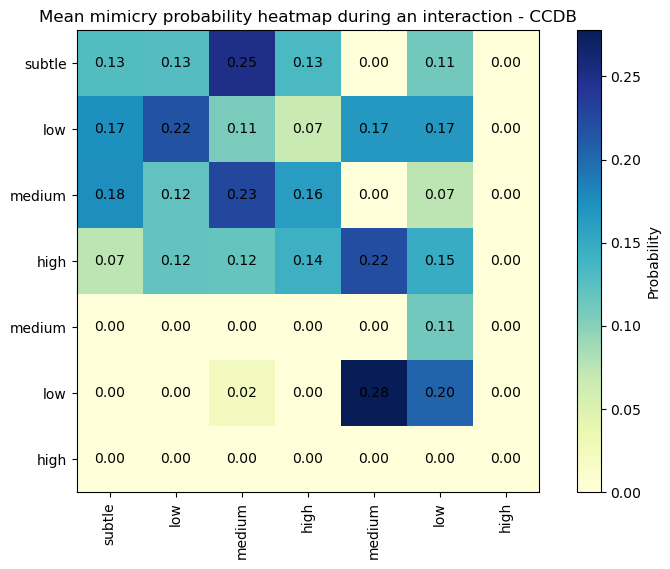

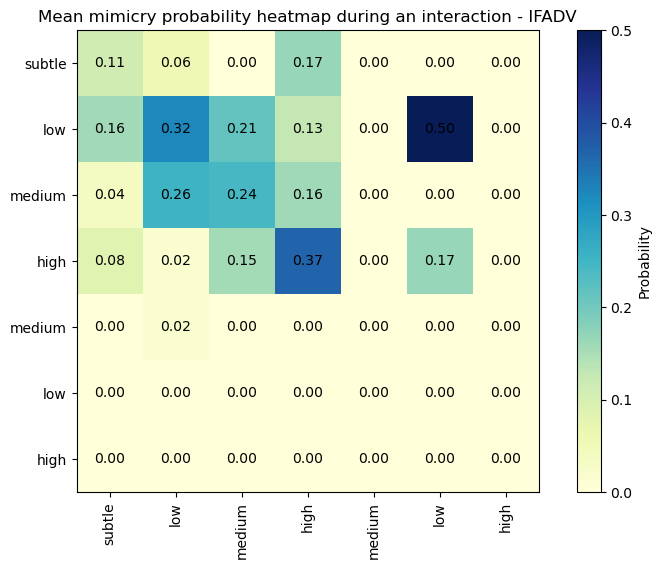

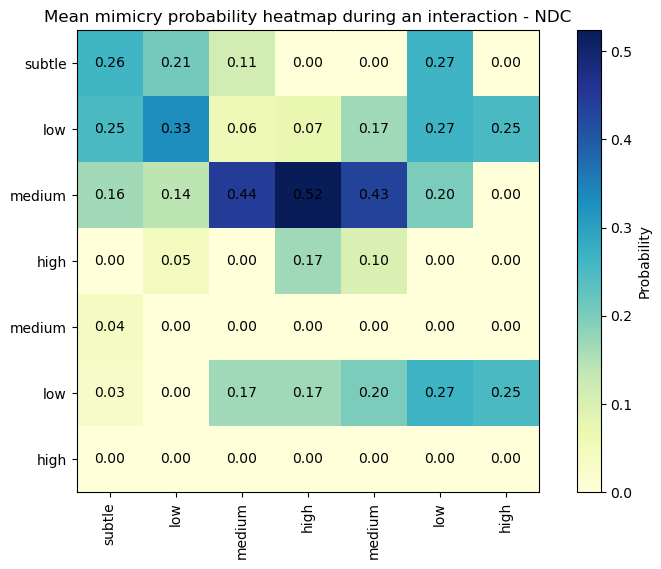

In [5]:
probabilities_matrix_2 = []
moyenne_prob_interaction_2 = 0

for i, database in enumerate(databases_name):
    if database == databases_pairs[i].replace('_pairs', '').upper():
        databases_list = databases_pair_paths[databases_pairs[i]]
    
    # Create a matrix with zeros
    num_entities_A = sum(len(tier_lists[expression_choiceA]) for expression_choiceA in expressions)
    num_entities_B = sum(len(tier_lists[expression_choiceB]) for expression_choiceB in expressions)
    probabilities_matrix_2 = np.zeros((num_entities_A, num_entities_B))
    
    # Track the current row and column index
    current_row = 0
    current_col = 0
    
    for j in range(len(expressions)):
        expression_choiceA = expressions[j]
        entitiesA = tier_lists[expression_choiceA]
        
        for entityA in entitiesA:
            for k in range(len(expressions)):
                expression_choiceB = expressions[k]
                entitiesB = tier_lists[expression_choiceB]
                
                for entityB in entitiesB:
                    list_mimicry_SL_entity = give_mimicry_folder2(databases_list, database.lower(), get_tier_dict_conv_folder, get_tier_dict_conv_folder, expression_choiceA, expression_choiceB, 'Intensity', label=[str.lower(entityA), str.lower(entityB)], delta_t=delta)
                    
                    for item in list_mimicry_SL_entity:
                        moyenne_prob_interaction_2 += item[1]
                    
                    moyenne_prob_interaction_2 = moyenne_prob_interaction_2 / len(list_mimicry_SL_entity)
                    probabilities_matrix_2[current_row, current_col] = moyenne_prob_interaction_2
                    moyenne_prob_interaction_2 = 0
                    
                    current_col += 1
            
            current_row += 1
            current_col = 0
    
    # Create a new figure for each database
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create the heatmap plot
    im = ax.imshow(probabilities_matrix_2, cmap='YlGnBu', interpolation='nearest')
    
    # Add the probability values within each square
    for x in range(num_entities_A):
        for y in range(num_entities_B):
            text_color = 'black'  # Default text color
            ax.text(y, x, f'{probabilities_matrix_2[x, y]:.2f}', ha='center', va='center', color=text_color)
    
    # Customize the plot
    fig.colorbar(im, ax=ax, label='Probability')
    
    # Set the x and y ticks and labels based on the number of entities
    xticks = np.arange(num_entities_B)
    yticks = np.arange(num_entities_A)
    
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    # Set the x and y tick labels based on the expressions and entities
    xtick_labels = []
    ytick_labels = []
    
    for expression_choiceB in expressions:
        entitiesB = tier_lists[expression_choiceB]
        xtick_labels.extend(entitiesB)
    
    for expression_choiceA in expressions:
        entitiesA = tier_lists[expression_choiceA]
        ytick_labels.extend(entitiesA)
    
    ax.set_xticklabels(xtick_labels, rotation=90)
    ax.set_yticklabels(ytick_labels)
    
    ax.set_title(f'Mean mimicry probability heatmap during an interaction - {database}')
    
    # Show the plot
    plt.show()

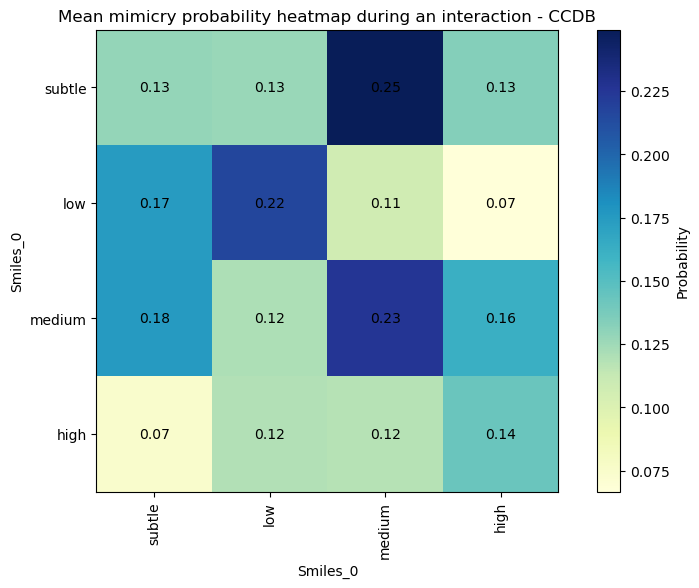

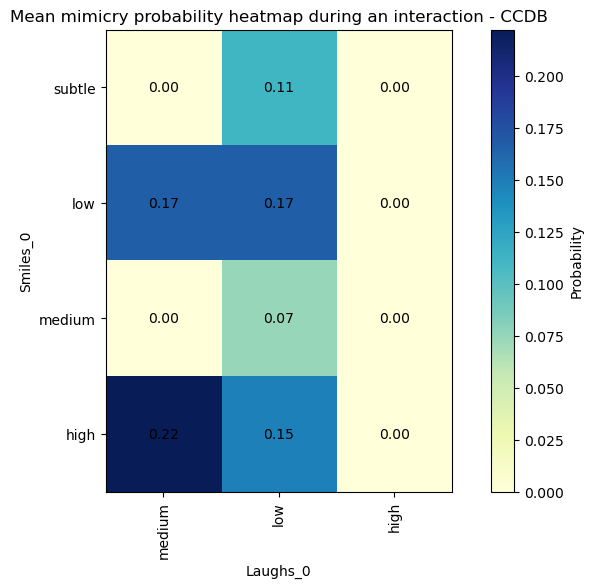

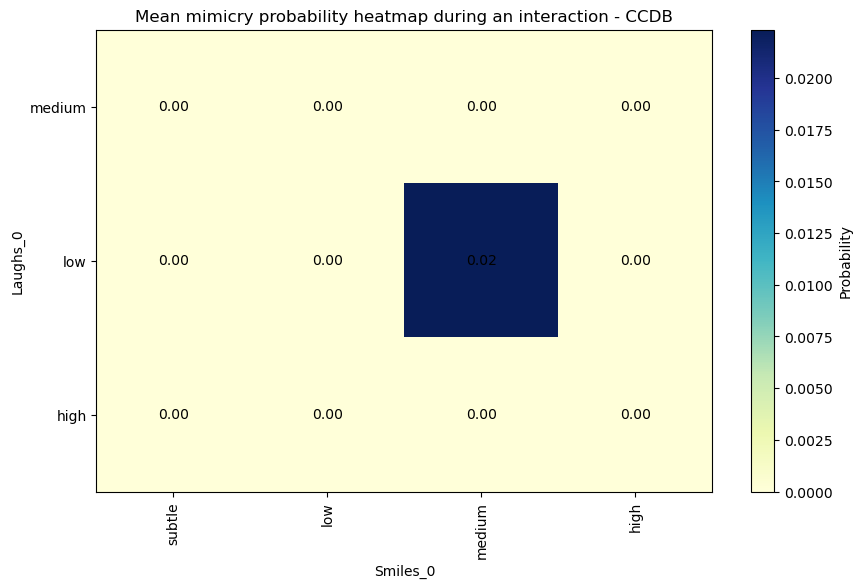

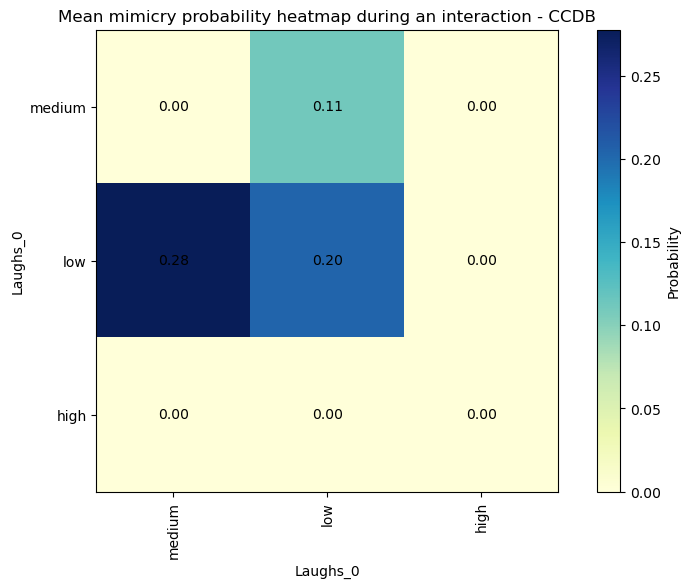

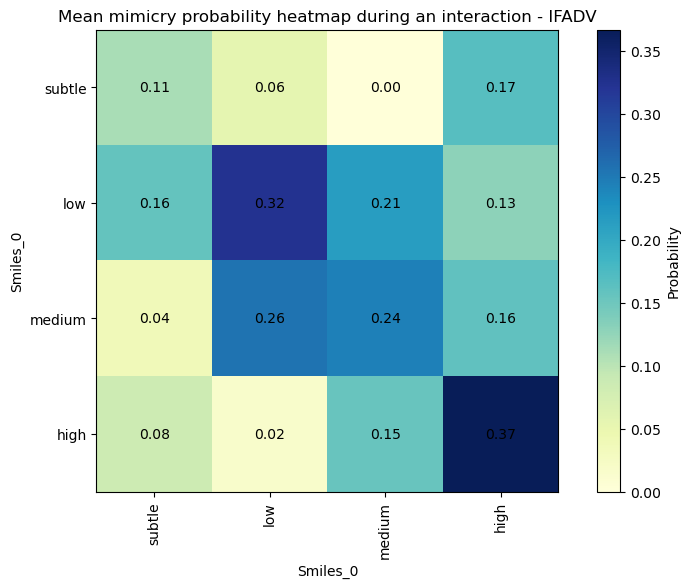

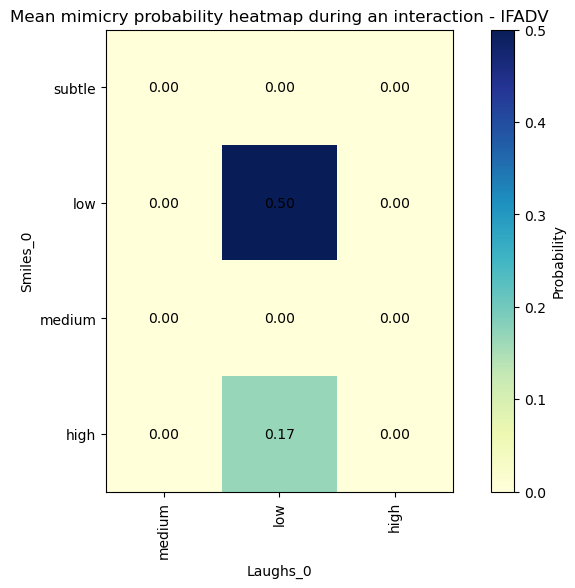

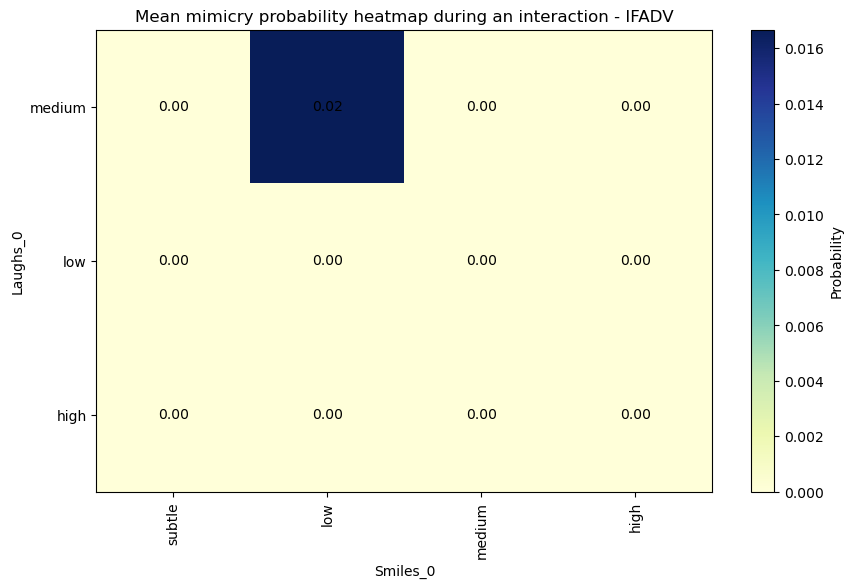

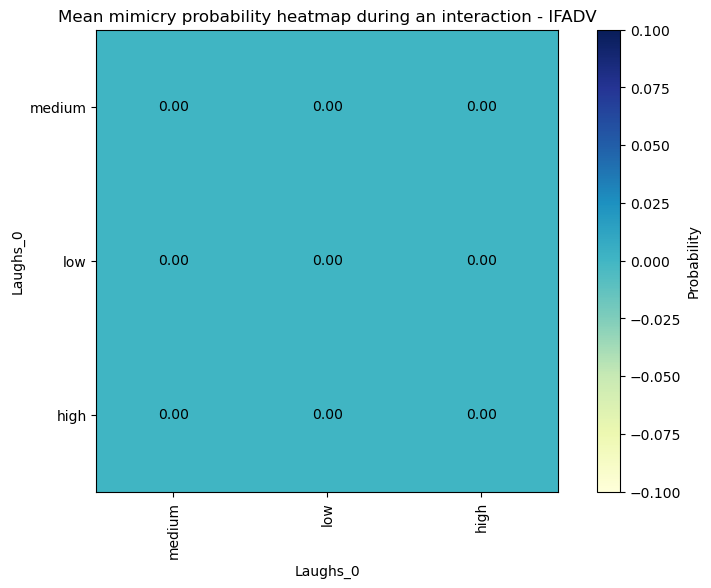

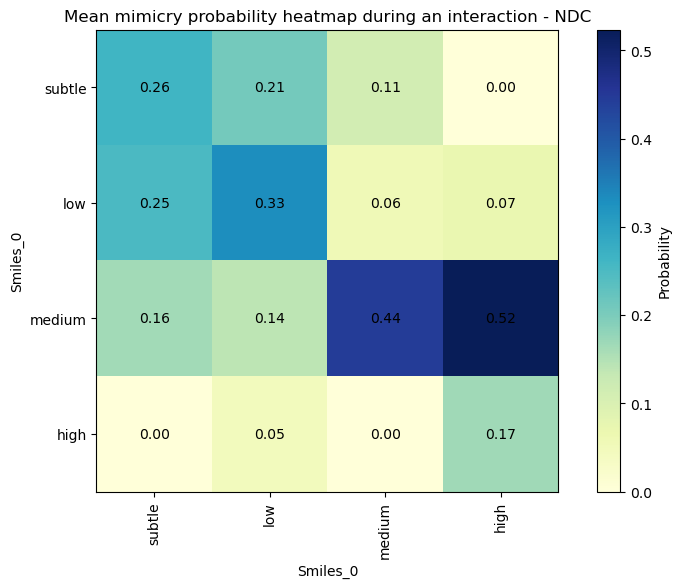

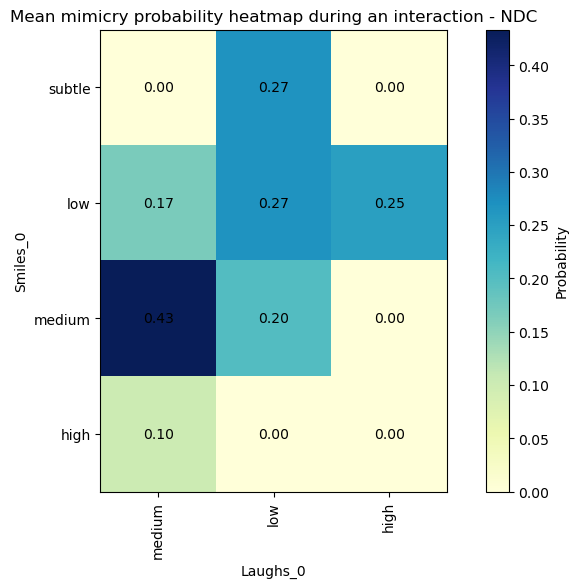

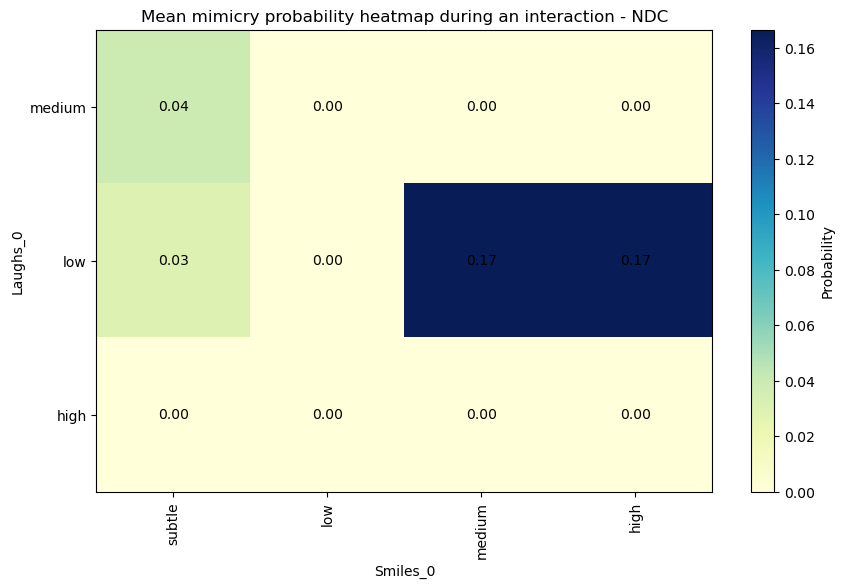

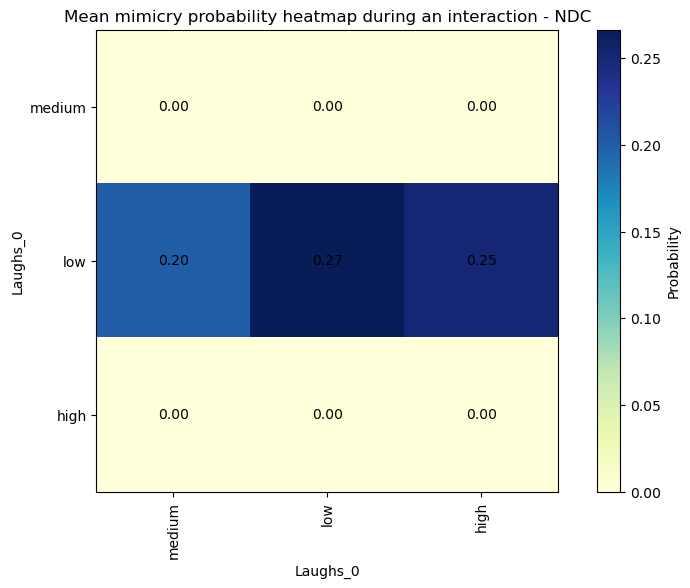

In [5]:
probabilities_matrix_2 = []
moyenne_prob_interaction_2 = 0


for i, database in enumerate(databases_name):
    if database == databases_pairs[i].replace('_pairs', '').upper():
        databases_list = databases_pair_paths[databases_pairs[i]]
    
    # Create a dictionary to store entities grouped by expressions
    entities_by_expression = {}

    # Group entities by expressions
    for expression_choiceA in expressions:
        entitiesA = tier_lists[expression_choiceA]
        for entityA in entitiesA:
            if expression_choiceA not in entities_by_expression:
                entities_by_expression[expression_choiceA] = []
            entities_by_expression[expression_choiceA].append(entityA)

    # Iterate over expression pairs and entities for each database
    for expression_choiceA, entitiesA in entities_by_expression.items():
        for expression_choiceB, entitiesB in entities_by_expression.items():
            # Create a matrix with zeros
            num_entities_A = len(entitiesA)
            num_entities_B = len(entitiesB)
            probabilities_matrix_2 = np.zeros((num_entities_A, num_entities_B))

            # Track the current row and column index
            current_row = 0
            current_col = 0

            for entityA in entitiesA:
                for entityB in entitiesB:
                    list_mimicry_SL_entity = give_mimicry_folder2(databases_list, database.lower(), get_tier_dict_conv_folder, get_tier_dict_conv_folder, expression_choiceA, expression_choiceB, 'Intensity', label=[str.lower(entityA), str.lower(entityB)], delta_t=delta)

                    for item in list_mimicry_SL_entity:
                        moyenne_prob_interaction_2 += item[1]

                    moyenne_prob_interaction_2 = moyenne_prob_interaction_2 / len(list_mimicry_SL_entity)
                    probabilities_matrix_2[current_row, current_col] = moyenne_prob_interaction_2
                    moyenne_prob_interaction_2 = 0

                    current_col += 1

                current_row += 1
                current_col = 0

            # Create a new figure for each expression pair and database
            fig, ax = plt.subplots(figsize=(10, 6))

            # Create the heatmap plot
            im = ax.imshow(probabilities_matrix_2, cmap='YlGnBu', interpolation='nearest')

            # Add the probability values within each square
            for x in range(num_entities_A):
                for y in range(num_entities_B):
                    text_color = 'black'
                    ax.text(y, x, f'{probabilities_matrix_2[x, y]:.2f}', ha='center', va='center', color=text_color)

            # Customize the plot
            fig.colorbar(im, ax=ax, label='Probability')

            # Set the x and y ticks and labels based on the number of entities
            xticks = np.arange(num_entities_B)
            yticks = np.arange(num_entities_A)

            ax.set_xticks(xticks)
            ax.set_yticks(yticks)

            # Set the x and y tick labels based on the entities
            ax.set_xticklabels(entitiesB, rotation=90)
            ax.set_yticklabels(entitiesA)

            ax.set_xlabel(expression_choiceB)
            ax.set_ylabel(expression_choiceA)
            ax.set_title(f'Mean mimicry probability heatmap during an interaction - {database}')

            # Show the plot
            plt.show()

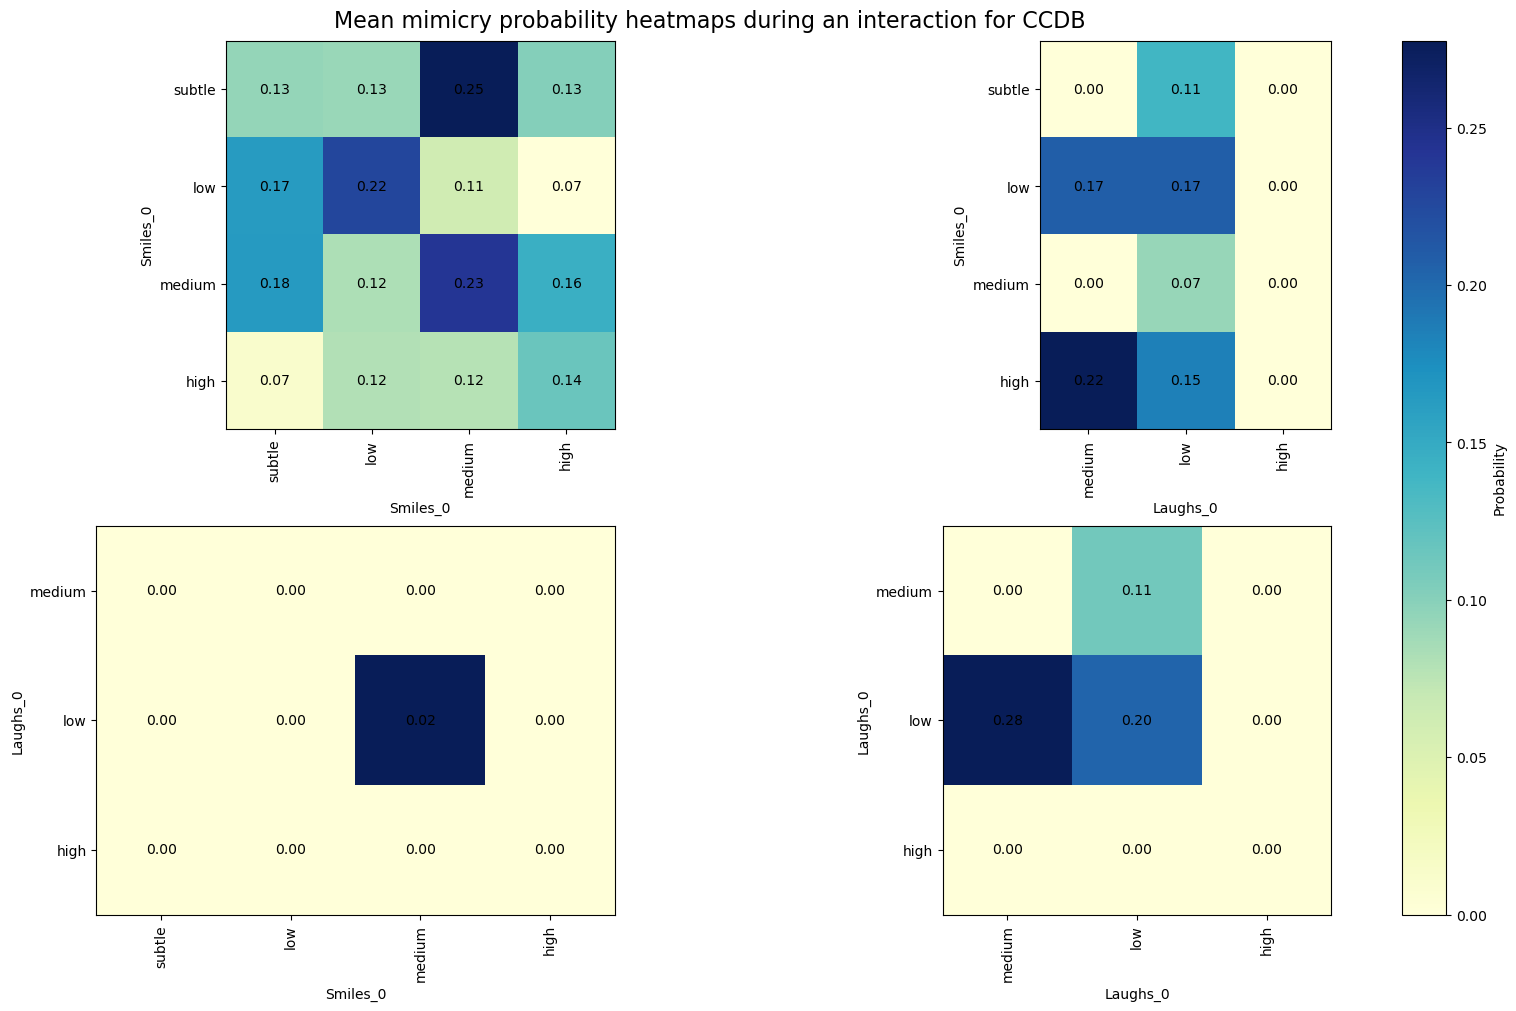

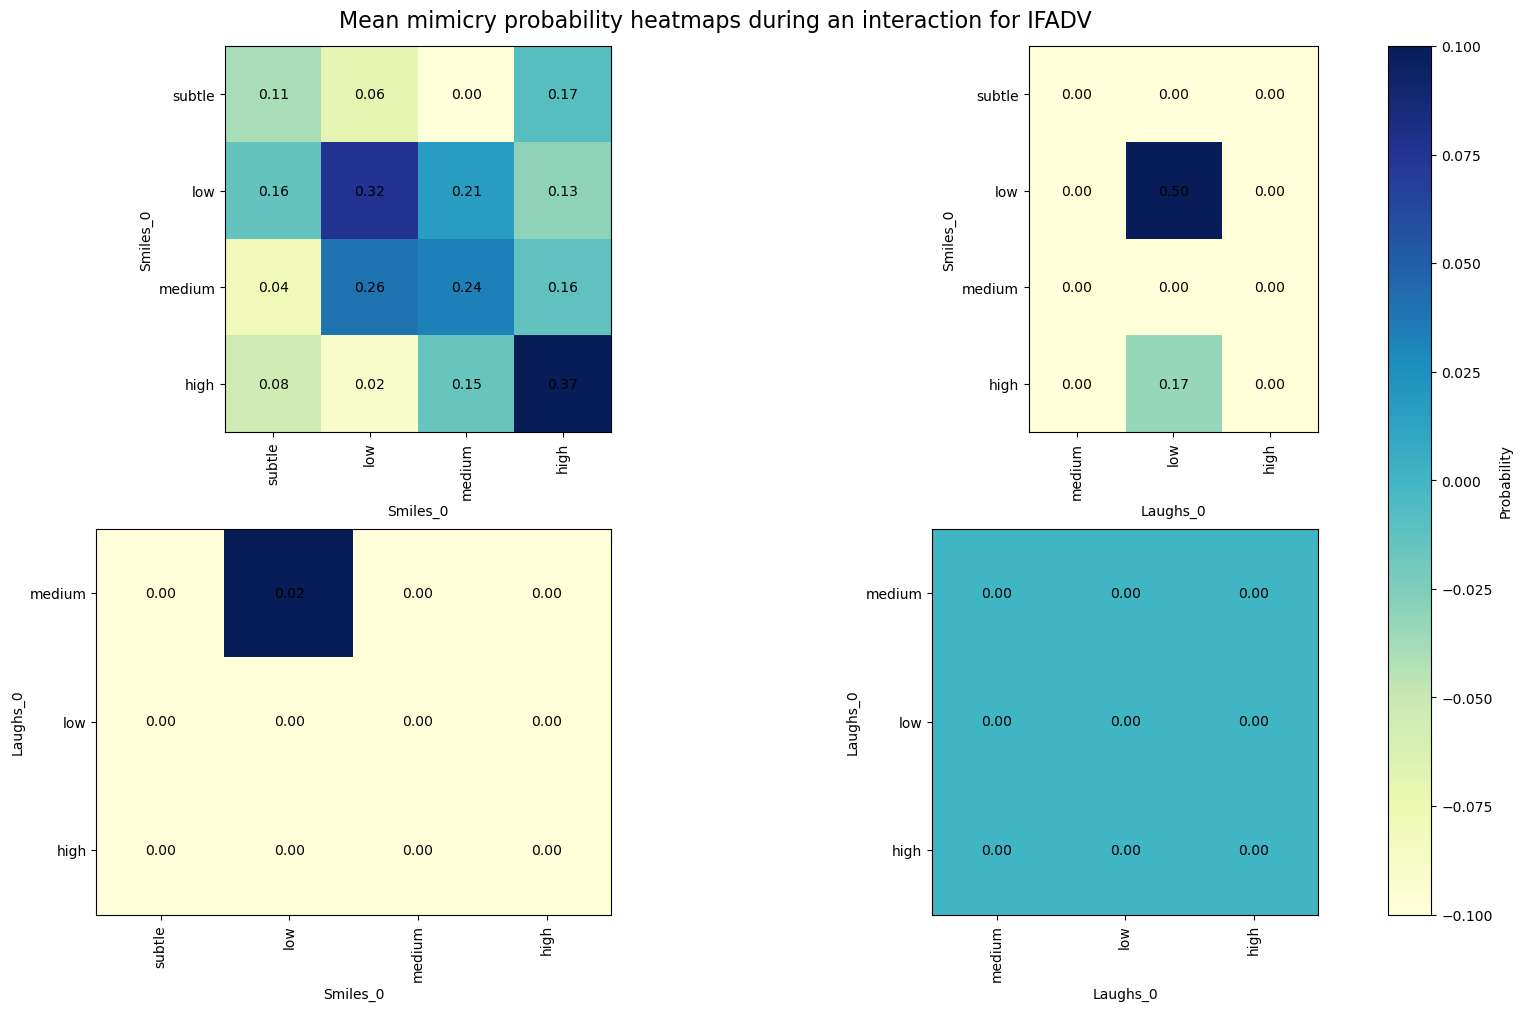

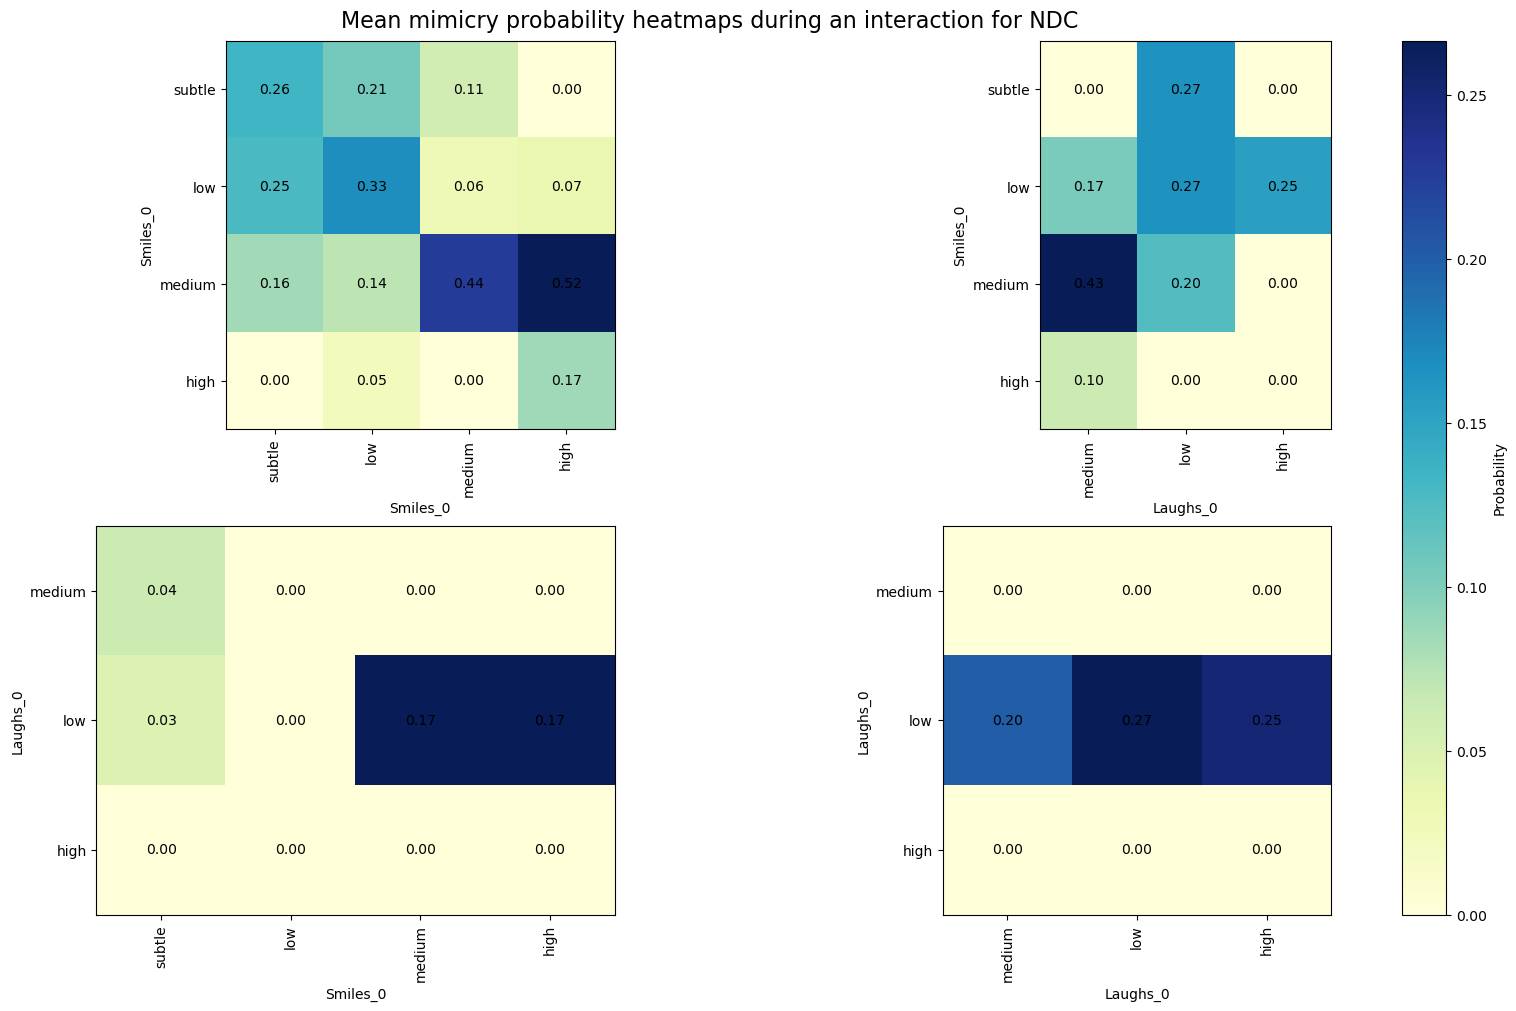

In [7]:
probabilities_matrix_2 = []
moyenne_prob_interaction_2 = 0

# Iterate over each database
for i, database in enumerate(databases_name):
    if database == databases_pairs[i].replace('_pairs', '').upper():
        databases_list = databases_pair_paths[databases_pairs[i]]

    # Create a new figure and axes
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10), constrained_layout=True)

    # Create a new dictionary to store entities grouped by expressions for each database
    entities_by_expression = {}

    # Group entities by expressions
    for expression_choiceA in expressions:
        entitiesA = tier_lists[expression_choiceA]
        for entityA in entitiesA:
            if expression_choiceA not in entities_by_expression:
                entities_by_expression[expression_choiceA] = []
            entities_by_expression[expression_choiceA].append(entityA)

    # Iterate over expression pairs and entities for each database
    for j, (expression_choiceA, entitiesA) in enumerate(entities_by_expression.items()):
        for k, (expression_choiceB, entitiesB) in enumerate(entities_by_expression.items()):
            # Create a matrix with zeros
            num_entities_A = len(entitiesA)
            num_entities_B = len(entitiesB)
            probabilities_matrix_2 = np.zeros((num_entities_A, num_entities_B))

            # Track the current row and column index
            current_row = 0
            current_col = 0

            for entityA in entitiesA:
                for entityB in entitiesB:
                    list_mimicry_SL_entity = give_mimicry_folder2(databases_list, database.lower(), get_tier_dict_conv_folder, get_tier_dict_conv_folder, expression_choiceA, expression_choiceB, 'Intensity', label=[str.lower(entityA), str.lower(entityB)], delta_t=delta)

                    for item in list_mimicry_SL_entity:
                        moyenne_prob_interaction_2 += item[1]

                    moyenne_prob_interaction_2 = moyenne_prob_interaction_2 / len(list_mimicry_SL_entity)
                    probabilities_matrix_2[current_row, current_col] = moyenne_prob_interaction_2
                    moyenne_prob_interaction_2 = 0

                    current_col += 1

                current_row += 1
                current_col = 0

            # Select the appropriate subplot for each heatmap
            ax = axs[j, k]

            # Create the heatmap plot
            im = ax.imshow(probabilities_matrix_2, cmap='YlGnBu', interpolation='nearest')

            # Add the probability values within each square
            for x in range(num_entities_A):
                for y in range(num_entities_B):
                    text_color = 'black'
                    ax.text(y, x, f'{probabilities_matrix_2[x, y]:.2f}', ha='center', va='center', color=text_color)

            # Customize the plot
            ax.set_xticks(np.arange(num_entities_B))
            ax.set_xticklabels(entitiesB, rotation=90)
            ax.set_yticks(np.arange(num_entities_A))
            ax.set_yticklabels(entitiesA)
            ax.set_xlabel(expression_choiceB)
            ax.set_ylabel(expression_choiceA)

    # Add a common colorbar for the heatmaps of each database
    fig.colorbar(im, ax=axs, label='Probability')

    # Add a common title for the heatmaps of each database
    fig.suptitle(f'Mean mimicry probability heatmaps during an interaction for {database}', fontsize=16)

    # Show the plot
    plt.show()

#### Analysis of the stats:

 Then, when laughs mimic smiles, the levels of laughs are lower for CCDB, IFADV while for NDC, we observe that even if the levels of laughs are generally lower, we can also have : a low level of smiles mimicked by a high level of laughs (25%), a subtle smile mimicked by a low laugh (27%).
 On the other hand, when smiles mimic laughs the smile levels are higher even if this type of mimicking is rarer.
 For smiles mimicking smiles, the levels mimicked have similar values.  
 And for laughs imitating laughs: mimicked levels are mostly lower for CCDB, highly variable for NDC and non-existent for IVADV.
 Lower levels of laughs mimicking smiles and higher levels of smiles mimicking laughs are in favor of the smile-laugh continuum theory mentioned earlier with smiles being on the low arousal side and laughs on the high side of a common arousal level scale for both S&L.

### Filtered by role 

#### For all entities:

In [ ]:
probabilities_matrix = []
moyenne_prob_interaction = 0
# Define the pairs of expressions for the heatmaps
entity_pairs = [("spk", "lsn"), ("lsn", "spk")]
for i, database in enumerate(databases_name):
    if database==databases_pairs[i].replace('_pairs','').upper():
                databases_list=databases_pair_paths[databases_pairs[i]]
    # Create a new figure and axes
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 10), constrained_layout=True)

    # Track the current row and column index
    current_row = 0
    current_col = 0

    # Create a 2x2 matrix with zeros
    probabilities_matrix_1 = np.zeros((len(expressions), len(expressions)))
    probabilities_matrix_2 = np.zeros((len(expressions), len(expressions)))
    for j in range(len(expressions)):
        expression_choiceA = expressions[j]
        for k in range(len(expressions)):
            expression_choiceB = expressions[k]
            for pair_index, (entityA, entityB) in enumerate(entity_pairs):
                # Get the statistics for each entity of Role (spk or lsn)
                list_mimicry_SL_by_role = give_mimicry_folder4(databases_list, database.lower(), get_tier_from_tier, get_tier_from_tier, expression_choiceA, expression_choiceB, tier_filter='Role', entity1=entityA, entity2=entityB, delta_t=delta)
                moyenne_prob_interaction = 0
                for item in list_mimicry_SL_by_role:
                    moyenne_prob_interaction += item[1]
                moyenne_prob_interaction = moyenne_prob_interaction/len(list_mimicry_SL_by_role)
                if entityA == "spk":
                    probabilities_matrix_1[current_row, current_col] = moyenne_prob_interaction
                elif entityA == "lsn":
                    probabilities_matrix_2[current_row, current_col] = moyenne_prob_interaction

            current_col += 1

        current_row += 1
        current_col = 0
    # Create the heatmaps for spk and lsn
    im_spk = axs[0].imshow(probabilities_matrix_1, cmap='YlGnBu', interpolation='nearest')
    im_lsn = axs[1].imshow(probabilities_matrix_2, cmap='YlGnBu', interpolation='nearest')

    # Add the probability values within each square for spk
    for x in range(len(expressions)):
        for y in range(len(expressions)):
            text_color_spk = 'black'
            axs[0].text(y, x, f'{probabilities_matrix_1[x, y]:.2f}', ha='center', va='center', color=text_color_spk)

    # Add the probability values within each square for lsn
    for x in range(len(expressions)):
        for y in range(len(expressions)):
            text_color_lsn = 'black'
            axs[1].text(y, x, f'{probabilities_matrix_2[x, y]:.2f}', ha='center', va='center', color=text_color_lsn)

    # Customize the plots for spk and lsn
    axs[0].set_xticks(range(len(expressions)))
    axs[0].set_yticks(range(len(expressions)))
    axs[0].set_xticklabels(['Smiles lsn', 'Laughs lsn'])
    axs[0].set_yticklabels(['Smiles spk', 'Laughs spk'])
    

    axs[1].set_xticks(range(len(expressions)))
    axs[1].set_yticks(range(len(expressions)))
    axs[1].set_xticklabels(['Smiles spk', 'Laughs spk'])
    axs[1].set_yticklabels(['Smiles lsn', 'Laughs lsn'])

    # Add a common colorbar for the heatmaps of each database
    fig.colorbar(im_spk, ax=axs, label='Probability')

    # Add a common title for the figure
    fig.suptitle(f'Mean mimicry probability heatmap during an interaction - {database}')

    # Show the plot
    plt.show()

##### Results:

#### For each entity:

In [ ]:
probabilities_matrix_3 = []
moyenne_prob_interaction_3 = 0
# Define the pairs of expressions for the heatmaps
entity_pairs = [("spk", "lsn"), ("lsn", "spk")]

# Iterate over each database
for i, database in enumerate(databases_name):
    if database == databases_pairs[i].replace('_pairs', '').upper():
        databases_list = databases_pair_paths[databases_pairs[i]]

    # Create a new figure and axes
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 10), constrained_layout=True)

    # Create a new dictionary to store entities grouped by expressions for each database
    entities_by_expression = {}

    # Group entities by expressions
    for expression_choiceA in expressions:
        entitiesA = tier_lists[expression_choiceA]
        for entityA in entitiesA:
            if expression_choiceA not in entities_by_expression:
                entities_by_expression[expression_choiceA] = []
            entities_by_expression[expression_choiceA].append(entityA)

    # Iterate over expression pairs and entities for each database
    for j, (expression_choiceA, entitiesA) in enumerate(entities_by_expression.items()):
        for k, (expression_choiceB, entitiesB) in enumerate(entities_by_expression.items()):
            # Create a matrix with zeros for spk and lsn categories
            num_entities_A = len(entitiesA)
            num_entities_B = len(entitiesB)
            probabilities_matrix_1 = np.zeros((num_entities_A, num_entities_B))
            probabilities_matrix_2 = np.zeros((num_entities_A, num_entities_B))

            # Track the current row and column index
            current_row = 0
            current_col = 0

            for entityA in entitiesA:
                for entityB in entitiesB:
                    for pair_index, (entity1, entity2) in enumerate(entity_pairs):
                        # Get the statistics for each entity of Role (spk or lsn)
                        list_mimicry_SL_by_role = give_mimicry_folder4(databases_list, database.lower(), get_tier_from_tier, get_tier_from_tier, expression_choiceA, expression_choiceB, 'Role', entity1=entity1, entity2=entity2, filter='Intensity', label=[str.lower(entityA), str.lower(entityB)], delta_t=delta)
                        moyenne_prob_interaction_3 = 0
                        for item in list_mimicry_SL_by_role:
                            moyenne_prob_interaction_3 += item[1]

                        moyenne_prob_interaction_3 /= len(list_mimicry_SL_by_role)

                        if entity1 == "spk":
                            probabilities_matrix_1[current_row, current_col] = moyenne_prob_interaction_3
                        elif entity1 == "lsn":
                            probabilities_matrix_2[current_row, current_col] = moyenne_prob_interaction_3

                    current_col += 1

                current_row += 1
                current_col = 0

            # Select the appropriate subplots for each heatmap
            ax_1 = axs[j, k * 2]
            ax_2 = axs[j, k * 2 + 1]

            # Create the heatmaps for spk and lsn
            im_spk = ax_1.imshow(probabilities_matrix_1, cmap='YlGnBu', interpolation='nearest')
            im_lsn = ax_2.imshow(probabilities_matrix_2, cmap='YlGnBu', interpolation='nearest')

            # Add the probability values within each square for spk and lsn
            for x in range(num_entities_A):
                for y in range(num_entities_B):
                    text_color_spk = 'black'
                    text_color_lsn = 'black'
                    ax_1.text(y, x, f'{probabilities_matrix_1[x, y]:.2f}', ha='center', va='center', color=text_color_spk)
                    ax_2.text(y, x, f'{probabilities_matrix_2[x, y]:.2f}', ha='center', va='center', color=text_color_lsn)

            # Customize the plots for spk
            ax_1.set_xticks(np.arange(num_entities_B))
            ax_1.set_xticklabels(entitiesB, rotation=90)
            ax_1.set_yticks(np.arange(num_entities_A))
            ax_1.set_yticklabels(entitiesA)
            ax_1.set_xlabel(f"{expression_choiceB} lsn")
            ax_1.set_ylabel(f"{expression_choiceA} spk")

            # Customize the plots for lsn
            ax_2.set_xticks(np.arange(num_entities_B))
            ax_2.set_xticklabels(entitiesB, rotation=90)
            ax_2.set_yticks(np.arange(num_entities_A))
            ax_2.set_yticklabels(entitiesA)
            ax_2.set_xlabel(f"{expression_choiceB} spk")
            ax_2.set_ylabel(f"{expression_choiceA} lsn")

    # Add a common colorbar for the heatmaps of each database
    fig.colorbar(im_spk, ax=axs, label='Probability')

    # Add a common title for the heatmaps of each database
    fig.suptitle(f'Mean mimicry probability heatmaps filtered by the role in the interaction for {database}', fontsize=16)

    # Show the plot
    plt.show()

##### Results:

TODO

## SMILE AND LAUGH SEQUENCES (intra)

Here, we are checking what is before and after an expression in ploting percentage of the preceded and next expression for each individual. 
That's mean we look at the sequence of expressions of an individual in order to see if there is any pattern or influence of the expressions in a same sequence.

### Track of previous expression for each dataset of each individual:

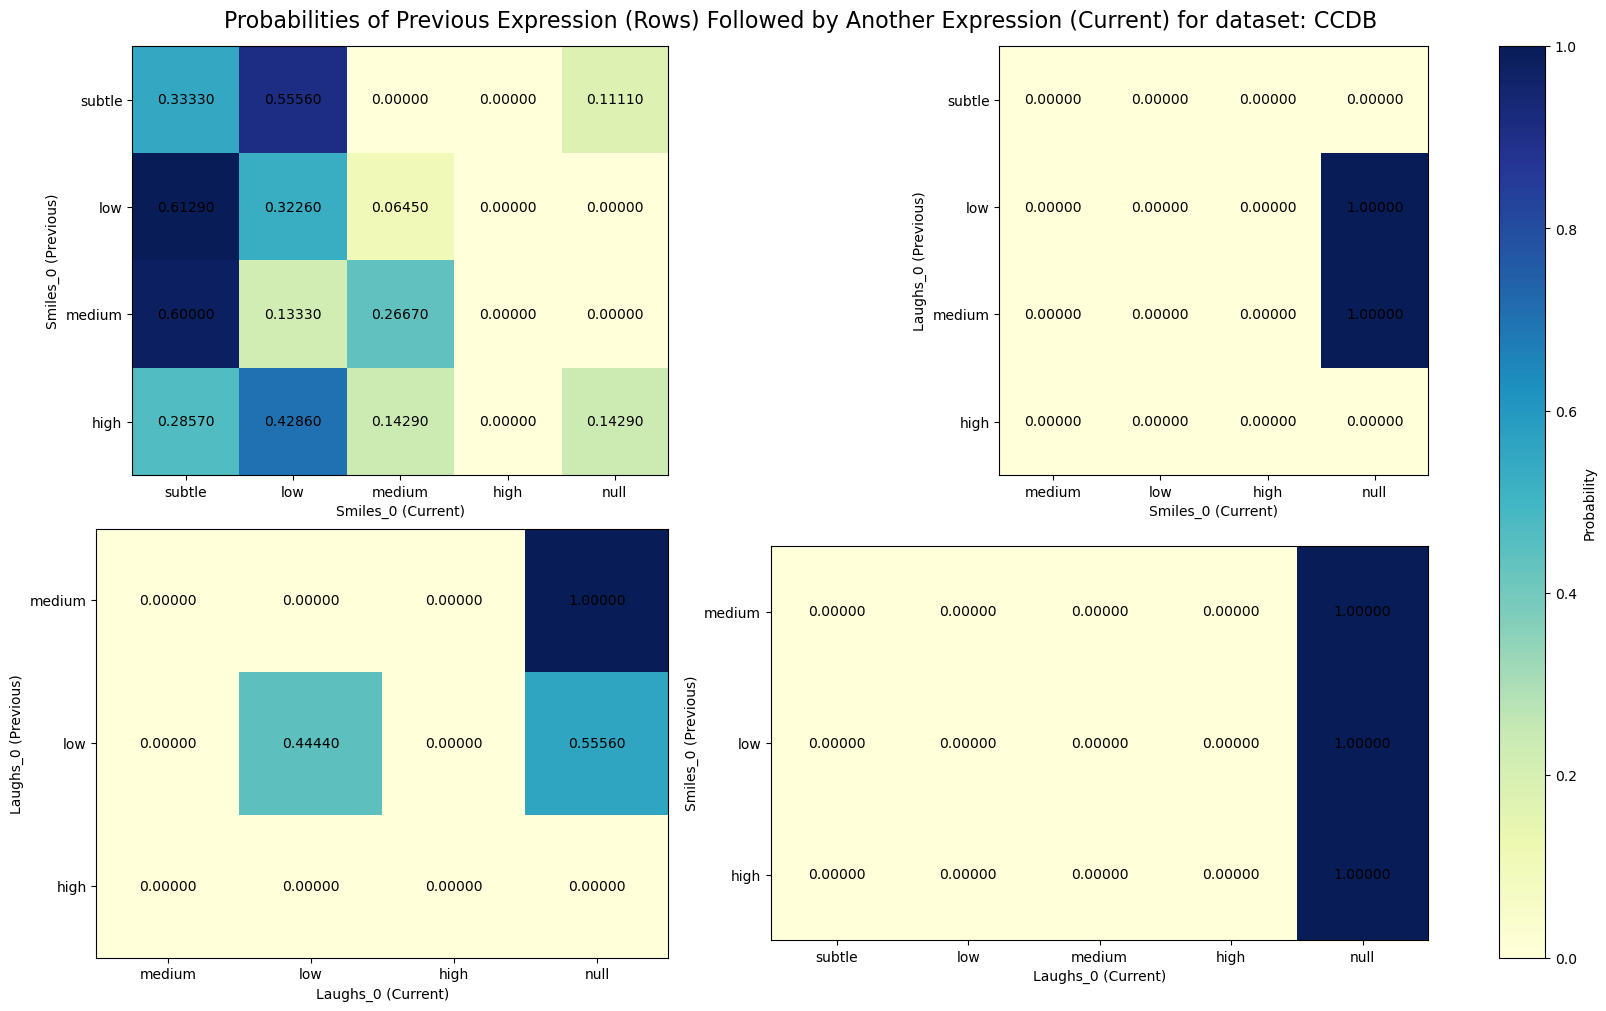

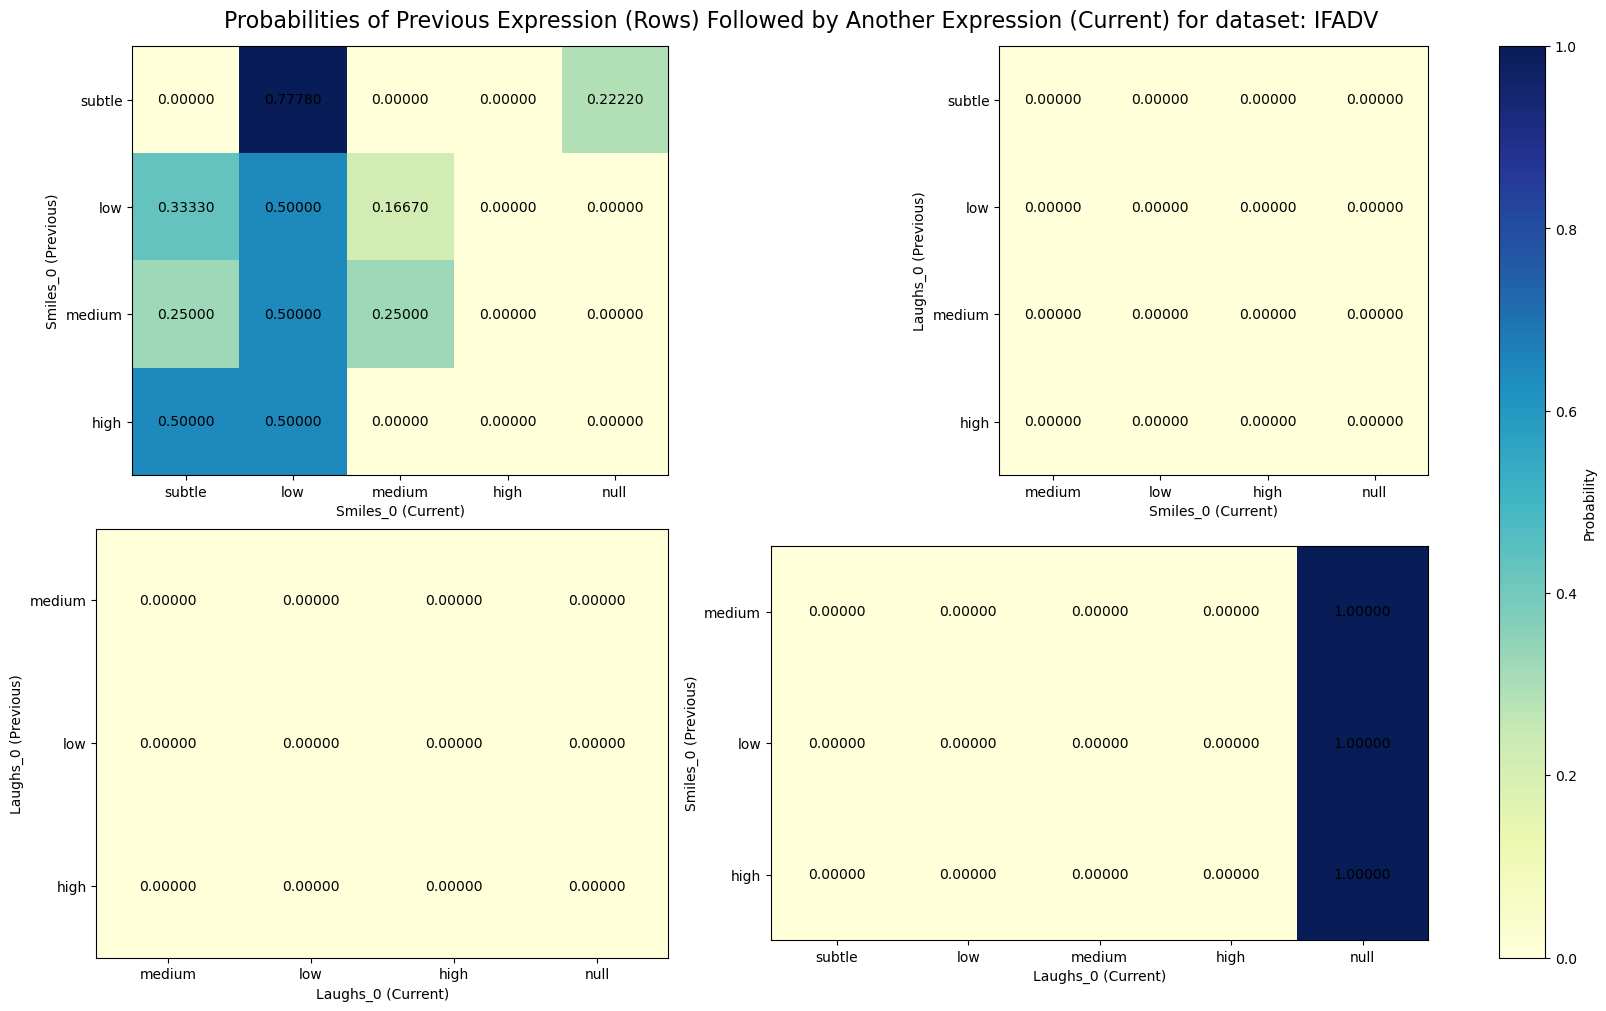

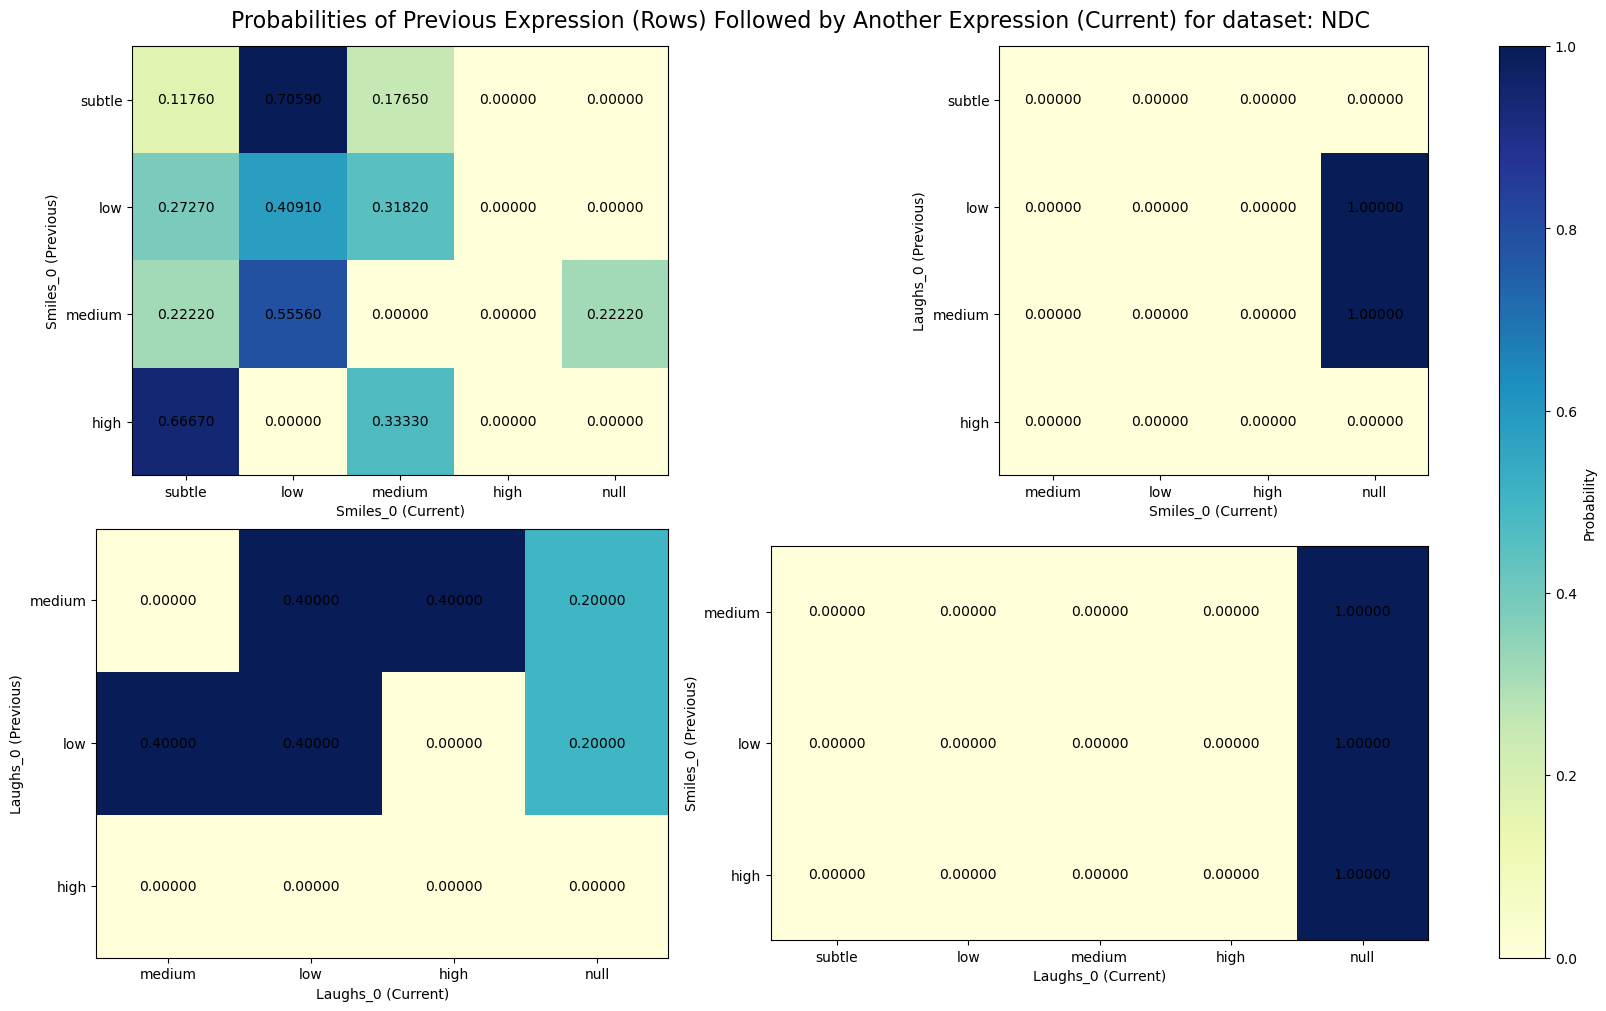

In [10]:
warnings.filterwarnings("ignore")
probabilities_matrix = []
moyenne_prob_interaction = 0
# Define the pairs of expressions for the heatmaps
expression_pairs = [("Smiles_0", "Smiles_0"), ("Smiles_0", "Laughs_0"), ("Laughs_0", "Laughs_0"), ("Laughs_0", "Smiles_0")]

# Iterate over the datasets
for dataset_index, database in enumerate(databases_name):
    # Create a new figure and axes for the current dataset
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10), constrained_layout=True)
    
    # Track the current row and column index
    current_row = 0
    current_col = 0
    
    # Iterate over the expression pairs for the heatmaps
    for pair_index, (expression_choiceA, expression_choiceB) in enumerate(expression_pairs):
        # Get the appropriate intensity labels based on the expressions
        intensity_labelsT = copy.deepcopy(smiles_intensities) if expression_choiceA == "Smiles_0" else copy.deepcopy(laughs_intensities)
        intensity_labelsC = copy.deepcopy(smiles_intensities) if expression_choiceB == "Smiles_0" else copy.deepcopy(laughs_intensities)
        intensity_labelsC.append("null")
        
        # Create a 2x2 matrix with zeros
        probabilities_matrix_intensity = np.zeros((len(intensity_labelsT), len(intensity_labelsC)))
        
        list_mimicry_TC = expression_track_byI(expression_choiceA, expression_choiceB, DIR, [database], tier_lists)
        list_mimicry_TC_prev = list_mimicry_TC[0]  # Previous expression DataFrame
        
        # Create the heatmap for previous expression
        ax = axs[current_row, current_col]
        for i, intensityC in enumerate(intensity_labelsC):
            for j, intensityT in enumerate(intensity_labelsT):
                try:
                    filtered_list_prev = list_mimicry_TC_prev[
                        (list_mimicry_TC_prev['Intensityp'] == intensityC) &
                        (list_mimicry_TC_prev[f'Current_level_{expression_choiceB}p'] == intensityT)
                    ]
                    percentage_prev = filtered_list_prev['Percentagep'].values[0] 
                    probabilities_matrix_intensity[j, i] = percentage_prev / 100.0
                except:
                    pass
                
        # Plot the heatmap
        im = ax.imshow(probabilities_matrix_intensity, cmap='YlGnBu', interpolation='nearest')
        # Add the text for each cell
        for i in range(len(intensity_labelsC)):
            for j in range(len(intensity_labelsT)):
                text = ax.text(i, j, f"{probabilities_matrix_intensity[j, i]:.5f}", ha='center', va='center', color='black')

        # Set the title for the current heatmap
        ax.set_xticks(range(len(intensity_labelsC)))
        ax.set_yticks(range(len(intensity_labelsT)))
        ax.set_xticklabels(intensity_labelsC)
        ax.set_yticklabels(intensity_labelsT)
        ax.set_xlabel(f"{expression_choiceA} (Current)")
        ax.set_ylabel(f"{expression_choiceB} (Previous)")
        
        # Update the current row and column index
        current_col += 1
        if current_col == 2:
            current_row += 1
            current_col = 0
    
    # Add a common colorbar for the heatmaps of each database
    fig.colorbar(im, ax=axs, label='Probability')

    # Set the title for the figure based on the dataset
    fig.suptitle(f"Probabilities of Previous Expression (Rows) Followed by Another Expression (Current) for dataset: {database}", fontsize=16)
    
    # Show the figure
    plt.show()

### Track of next expression for each dataset of each individual:

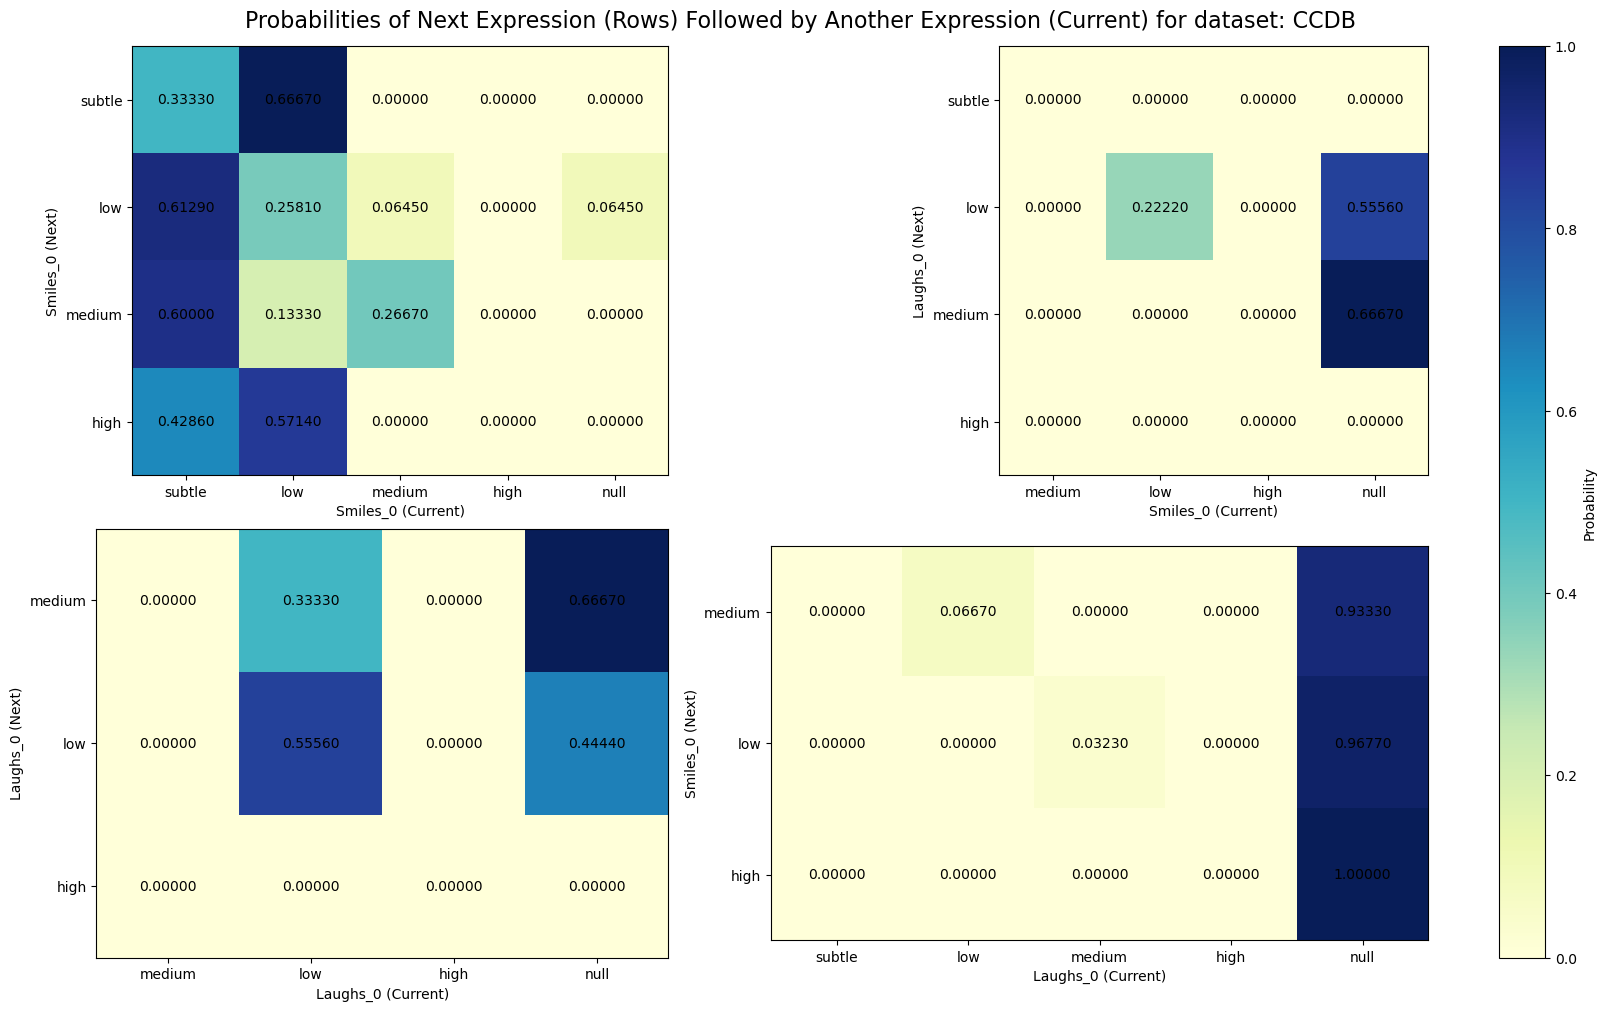

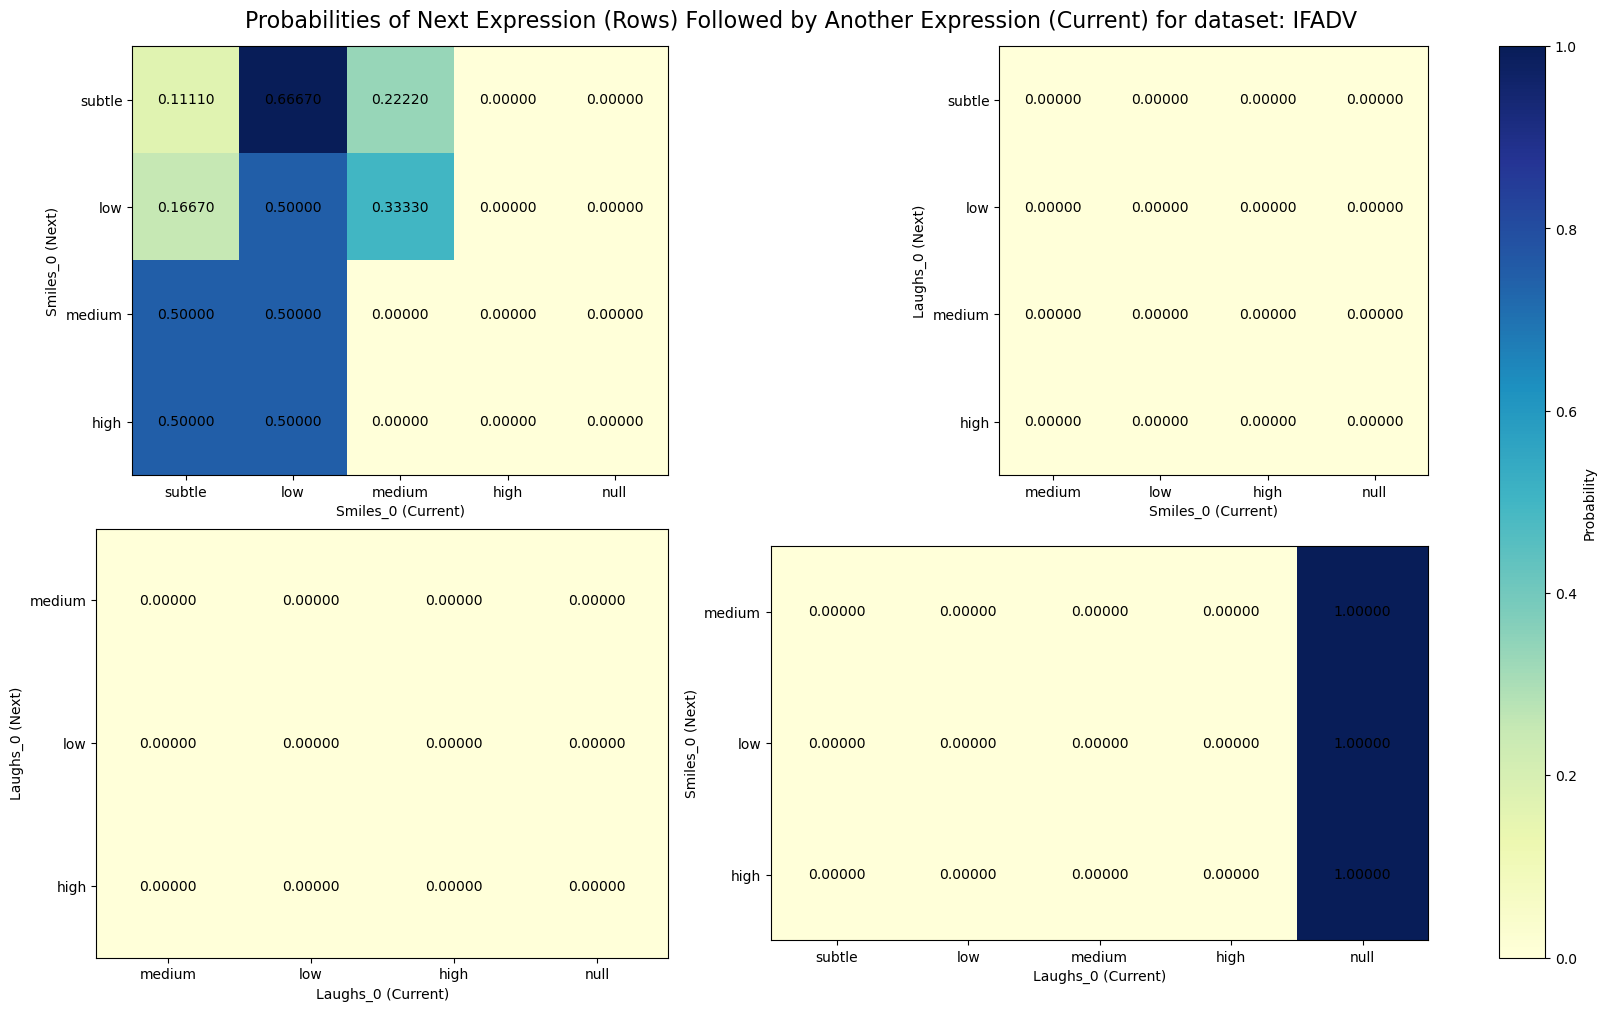

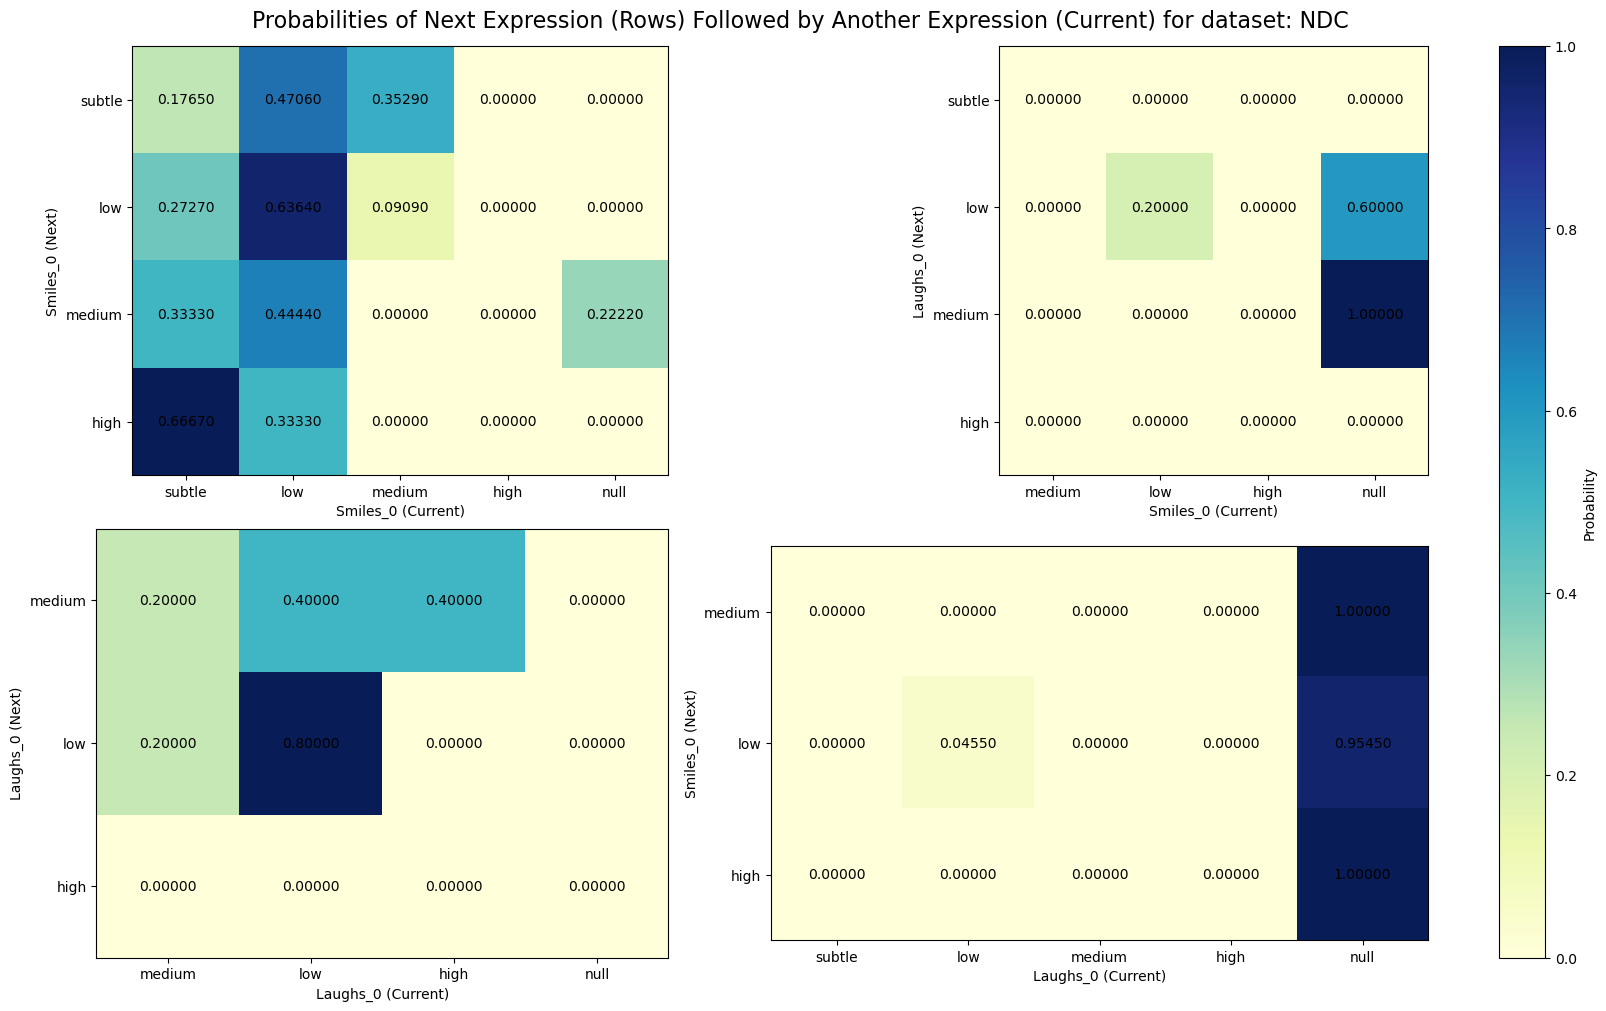

In [11]:
probabilities_matrix = []
moyenne_prob_interaction = 0
# Define the pairs of expressions for the heatmaps
expression_pairs = [("Smiles_0", "Smiles_0"), ("Smiles_0", "Laughs_0"), ("Laughs_0", "Laughs_0"), ("Laughs_0", "Smiles_0")]

# Iterate over the datasets
for dataset_index, database in enumerate(databases_name):
    # Create a new figure and axes for the current dataset
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10), constrained_layout=True)
    
    # Track the current row and column index
    current_row = 0
    current_col = 0
    
    # Iterate over the expression pairs for the heatmaps
    for pair_index, (expression_choiceA, expression_choiceB) in enumerate(expression_pairs):
        # Get the appropriate intensity labels based on the expressions
        intensity_labelsT = copy.deepcopy(smiles_intensities) if expression_choiceA == "Smiles_0" else copy.deepcopy(laughs_intensities)
        intensity_labelsC = copy.deepcopy(smiles_intensities) if expression_choiceB == "Smiles_0" else copy.deepcopy(laughs_intensities)
        intensity_labelsC.append("null")
        
        # Create a 2x2 matrix with zeros
        probabilities_matrix_intensity = np.zeros((len(intensity_labelsT), len(intensity_labelsC)))
        
        list_mimicry_TC = expression_track_byI(expression_choiceA, expression_choiceB, DIR, [database], tier_lists)
        list_mimicry_TC_next = list_mimicry_TC[1]  # Next expression DataFrame
        
        # Create the heatmap for next expression
        ax = axs[current_row, current_col]
        for i, intensityC in enumerate(intensity_labelsC):
            for j, intensityT in enumerate(intensity_labelsT):
                try :
                    filtered_list_next = list_mimicry_TC_next[
                        (list_mimicry_TC_next['Intensityf'] == intensityC) &
                        (list_mimicry_TC_next[f'Current_level_{expression_choiceB}f'] == intensityT)
                    ]
                    percentage_next = filtered_list_next['Percentagef'].values[0]
                    probabilities_matrix_intensity[j, i] = percentage_next / 100.0
                except:
                    pass
                
        # Plot the heatmap
        im = ax.imshow(probabilities_matrix_intensity, cmap='YlGnBu', interpolation='nearest')
        # Add the text for each cell
        for i in range(len(intensity_labelsC)):
            for j in range(len(intensity_labelsT)):
                text = ax.text(i, j, f"{probabilities_matrix_intensity[j, i]:.5f}", ha='center', va='center', color='black')

        # Set the title for the current heatmap
        ax.set_xticks(range(len(intensity_labelsC)))
        ax.set_yticks(range(len(intensity_labelsT)))
        ax.set_xticklabels(intensity_labelsC)
        ax.set_yticklabels(intensity_labelsT)
        ax.set_xlabel(f"{expression_choiceA} (Current)")
        ax.set_ylabel(f"{expression_choiceB} (Next)")
        
        # Update the current row and column index
        current_col += 1
        if current_col == 2:
            current_row += 1
            current_col = 0
    
    # Add a common colorbar for the heatmaps of each database
    fig.colorbar(im, ax=axs, label='Probability')

    # Set the title for the figure based on the dataset
    fig.suptitle(f"Probabilities of Next Expression (Rows) Followed by Another Expression (Current) for dataset: {database}", fontsize=16)
    
    # Show the figure
    plt.show()

### Track of expression for each dataset of each individual:

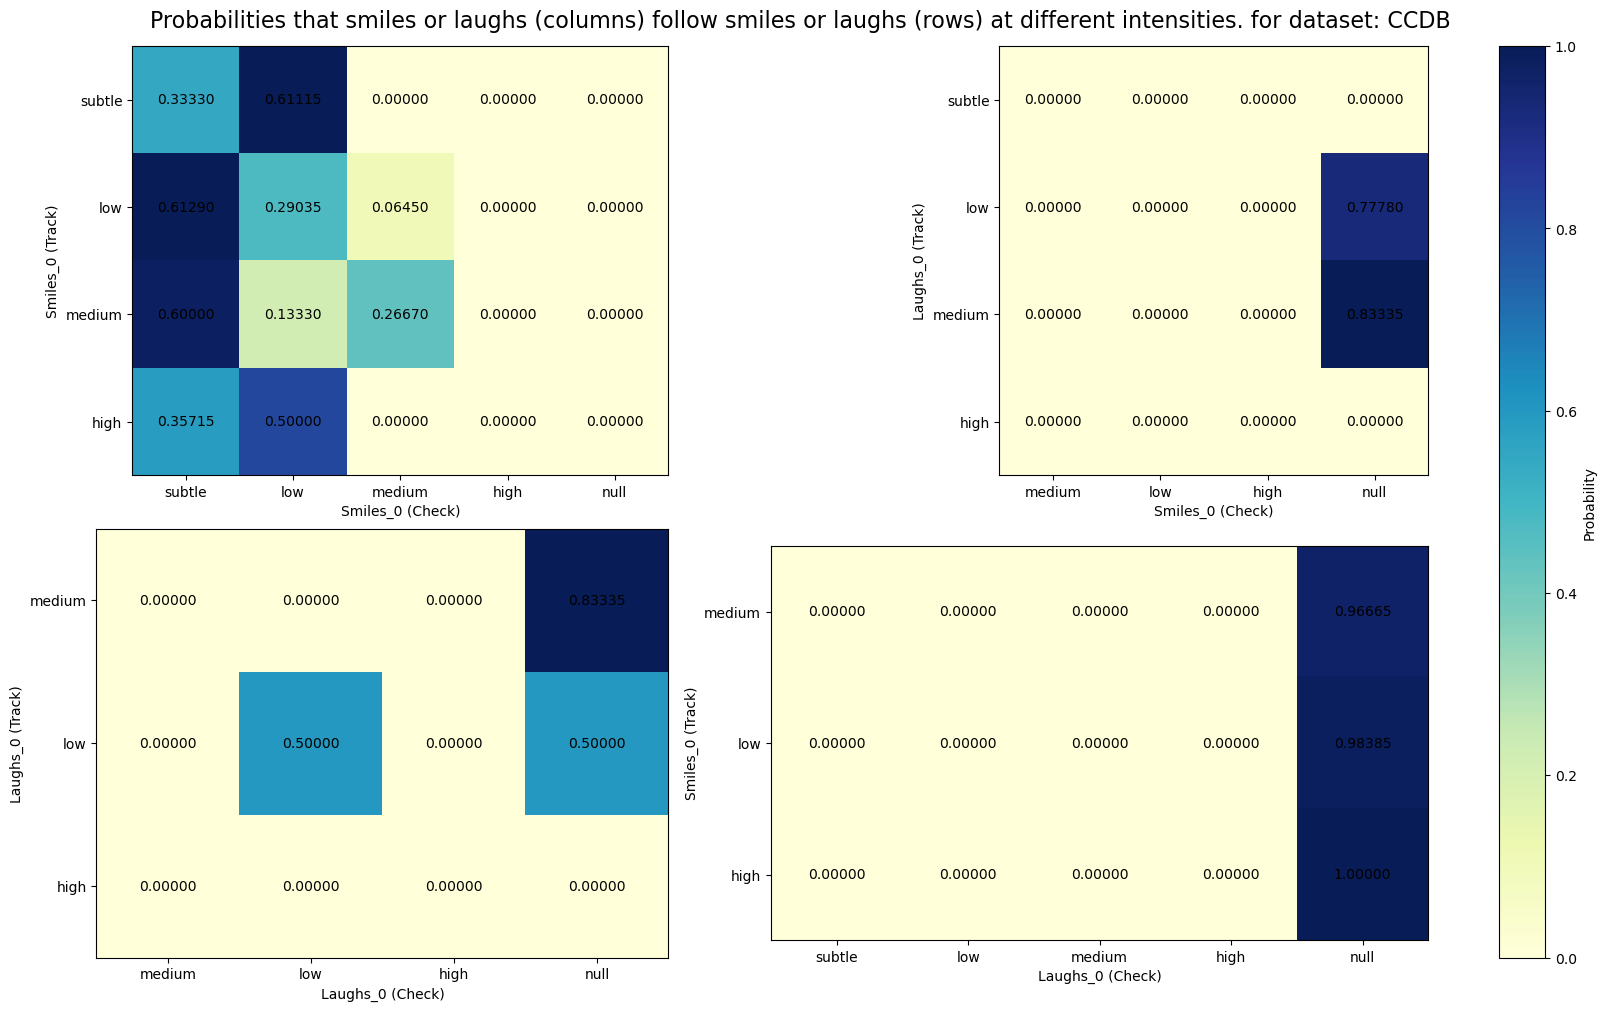

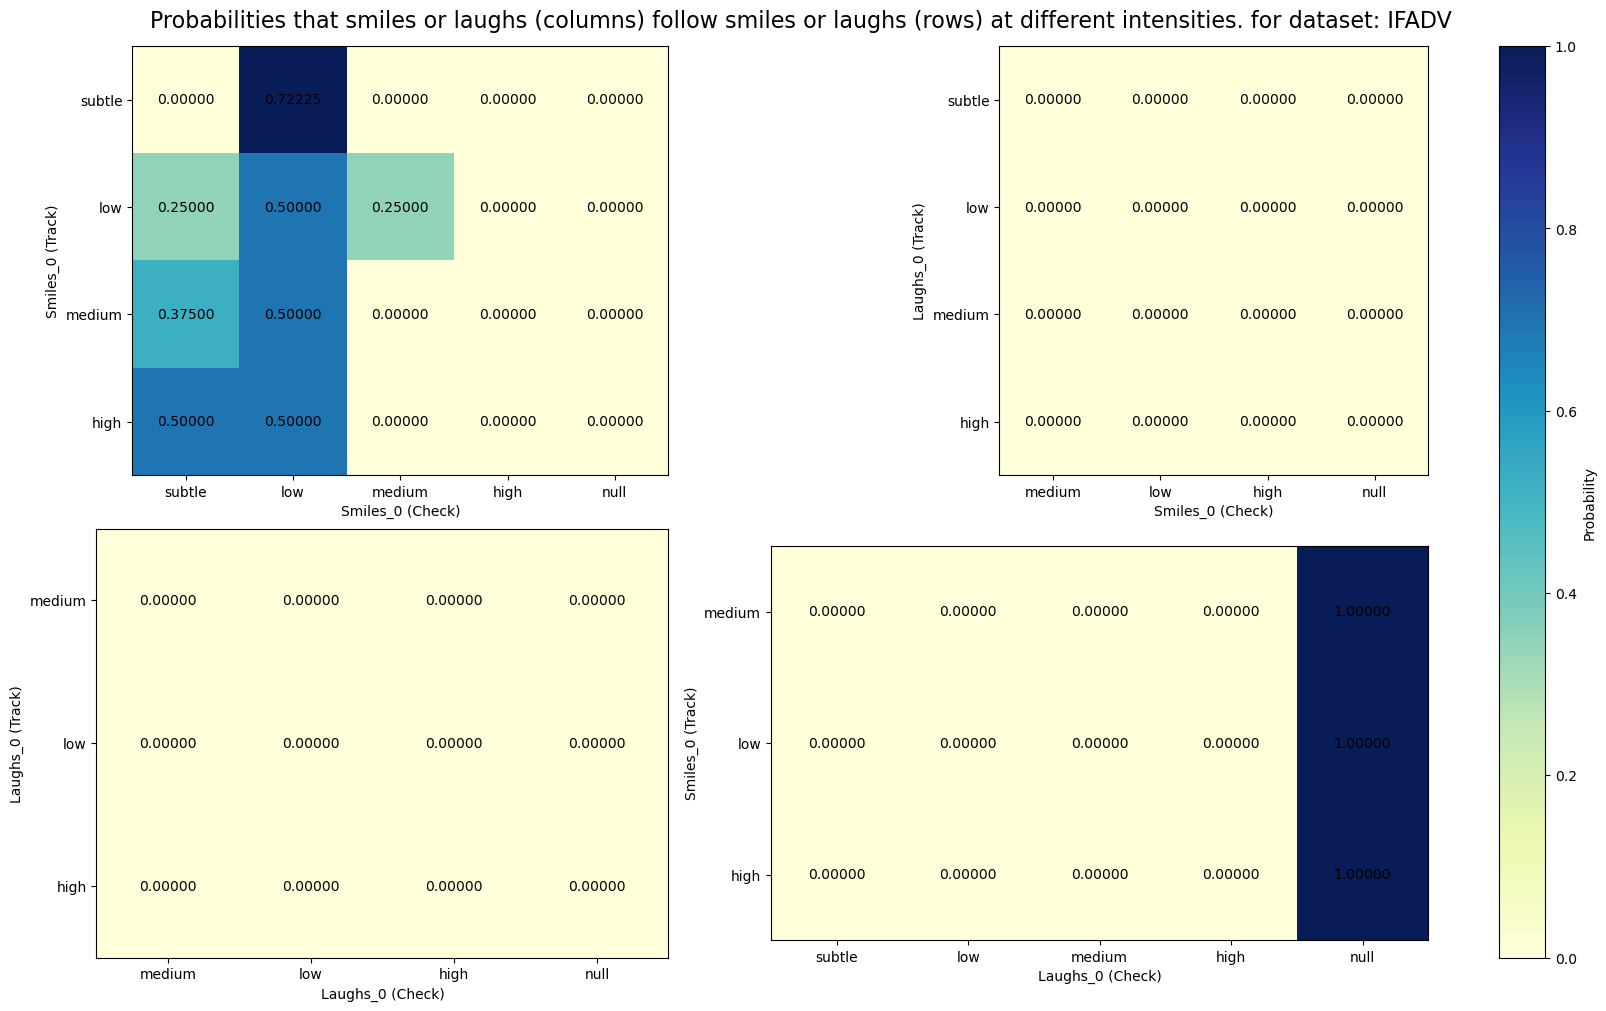

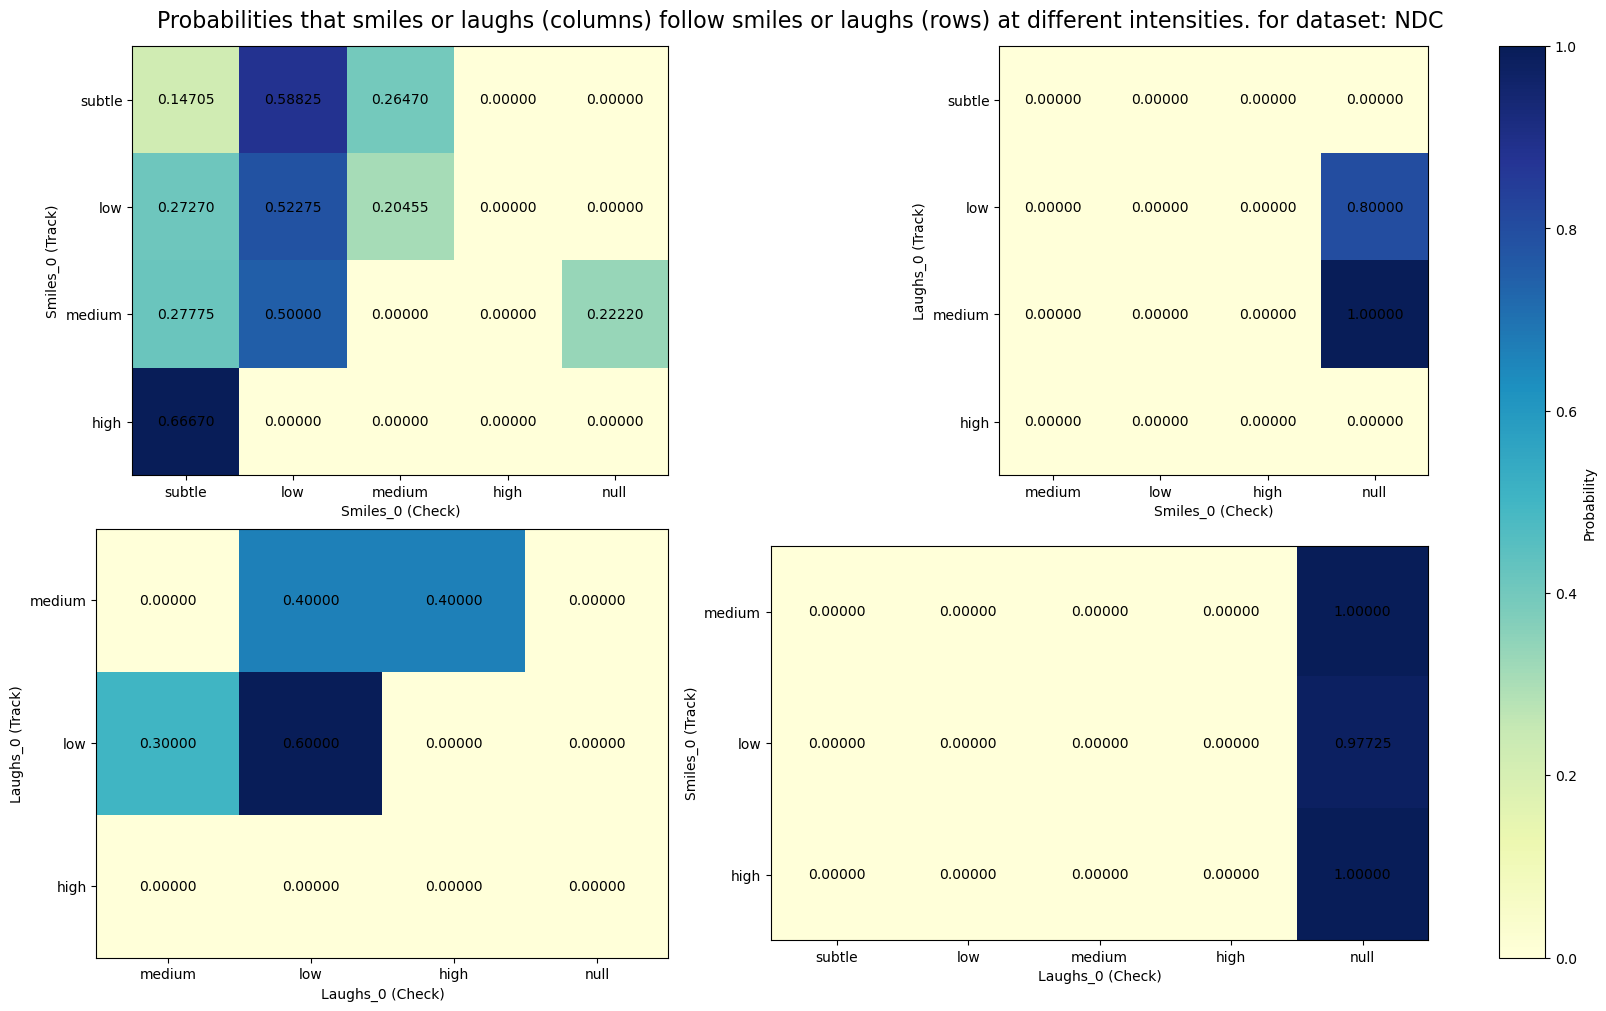

In [13]:
probabilities_matrix = []
moyenne_prob_interaction = 0
# Define the pairs of expressions for the heatmaps
expression_pairs = [("Smiles_0", "Smiles_0"), ("Smiles_0", "Laughs_0"), ("Laughs_0", "Laughs_0"), ("Laughs_0", "Smiles_0")]

# Iterate over the datasets
for dataset_index, database in enumerate(databases_name):
    # Create a new figure and axes for the current dataset
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10), constrained_layout=True)
    
    # Track the current row and column index
    current_row = 0
    current_col = 0
    
    # Iterate over the expression pairs for the heatmaps
    for pair_index, (expression_choiceA, expression_choiceB) in enumerate(expression_pairs):
        # Get the appropriate intensity labels based on the expressions
        intensity_labelsT = copy.deepcopy(smiles_intensities) if expression_choiceA == "Smiles_0" else copy.deepcopy(laughs_intensities)
        intensity_labelsC = copy.deepcopy(smiles_intensities) if expression_choiceB == "Smiles_0" else copy.deepcopy(laughs_intensities)
        intensity_labelsC.append("null")
        
        # Create a 2x2 matrix with zeros
        probabilities_matrix_intensity = np.zeros((len(intensity_labelsT), len(intensity_labelsC)))
        
        list_mimicry_TC = expression_track_byI(expression_choiceA, expression_choiceB, DIR, [database], tier_lists)
        list_mimicry_TC_prev = list_mimicry_TC[0]  # Previous expression DataFrame
        list_mimicry_TC_next = list_mimicry_TC[1]  # Next expression DataFrame
        
        # Create the heatmap for combined expressions
        ax = axs[current_row, current_col]
        for i, intensityC in enumerate(intensity_labelsC):
            for j, intensityT in enumerate(intensity_labelsT):
                try :
                    filtered_list_prev = list_mimicry_TC_prev[
                        (list_mimicry_TC_prev['Intensityp'] == intensityC) &
                        (list_mimicry_TC_prev[f'Current_level_{expression_choiceB}p'] == intensityT)
                    ]
                    percentage_prev2 = filtered_list_prev['Percentagep'].values[0]
                    
                    filtered_list_next = list_mimicry_TC_next[
                        (list_mimicry_TC_next['Intensityf'] == intensityC) &
                        (list_mimicry_TC_next[f'Current_level_{expression_choiceB}f'] == intensityT)
                    ]
                    percentage_next2 = filtered_list_next['Percentagef'].values[0]
                    # Average the percentages for previous and next expressions
                    combined_percentage = (percentage_prev2 + percentage_next2) / 2
                    probabilities_matrix_intensity[j, i] = combined_percentage / 100.0
                except:
                    pass
                
        # Plot the heatmap
        im = ax.imshow(probabilities_matrix_intensity, cmap='YlGnBu', interpolation='nearest')
        # Add the text for each cell
        for i in range(len(intensity_labelsC)):
            for j in range(len(intensity_labelsT)):
                text = ax.text(i, j, f"{probabilities_matrix_intensity[j, i]:.5f}", ha='center', va='center', color='black')

        # Set the title for the current heatmap
        ax.set_xticks(range(len(intensity_labelsC)))
        ax.set_yticks(range(len(intensity_labelsT)))
        ax.set_xticklabels(intensity_labelsC)
        ax.set_yticklabels(intensity_labelsT)
        ax.set_xlabel(f"{expression_choiceA} (Check)")
        ax.set_ylabel(f"{expression_choiceB} (Track)")
        
        # Update the current row and column index
        current_col += 1
        if current_col == 2:
            current_row += 1
            current_col = 0
    
    # Add a common colorbar for the heatmaps of each database
    fig.colorbar(im, ax=axs, label='Probability')

    # Set the title for the figure based on the dataset
    fig.suptitle(f"Probabilities that smiles or laughs (columns) follow smiles or laughs (rows) at different intensities. for dataset: {database}", fontsize=16)
    
    # Show the figure
    plt.show()

##### Results:

TODO